In [1]:
import gc
gc.collect()
import os
import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
stop_words_list = stopwords.words("english")
import string
punctuation = list(string.punctuation)
import nltk
from nltk.stem import WordNetLemmatizer
import gensim
from collections import Counter
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
pd.set_option('display.max_colwidth', None)
data=pd.read_csv("C:/Users/Stefano/Desktop/DSE/TEXT MINING/PROGETTO/DATASET/tweet_emotions.csv")
data.head()

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                        content  
0  @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[  
1                                  Layin n bed with a headache  ughhhh...waitin on your call...  
2                                                           Funeral ceremony...gloomy friday...  
3                                                          wants to hang out with friends SOON!  
4        @dannycastillo We want to trade with someone who has Houston tickets, but no one will.

In [4]:
data["content"]=data["content"].apply(lambda x:" ".join(x.lower() for x in x.split()))
data.head()

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                       content  
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[  
1                                  layin n bed with a headache ughhhh...waitin on your call...  
2                                                          funeral ceremony...gloomy friday...  
3                                                         wants to hang out with friends soon!  
4       @dannycastillo we want to trade with someone who has houston tickets, but no one will.

In [4]:
from nltk import TweetTokenizer

In [5]:
#!pip install language-tool-python
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')  
tool = language_tool_python.LanguageToolPublicAPI('en-US') 


In [ ]:
import re
#nltk.download('punkt')
index_exceptions=[]
sentence_corrected=[]
for index,sentence in enumerate(data["content"]):
    sentence=re.sub("(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])", "", sentence)
    sentence=re.sub("/(?:(?:https?|ftp|file):\/\/|www\.|ftp\.)(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[-A-Z0-9+&@#\/%=~_|$?!:,.])*(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[A-Z0-9+&@#\/%=~_|$])/igm", "", sentence) #forse è superfluo
    sentence=re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", sentence)
    sentence=re.sub(r"@\S+", "",sentence)
    try:
        sentence=tool.correct(sentence)
    except:
        index_exceptions.append(index)
        pass
    sentence_corrected.append(sentence)
data["sentence_corrected"]=sentence_corrected

In [ ]:
data["sentence_corrected"]=sentence_corrected
data.head()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            40000 non-null  int64 
 1   sentiment           40000 non-null  object
 2   content             40000 non-null  object
 3   sentence_corrected  39925 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
data=data.loc[data["sentence_corrected"].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39925 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            39925 non-null  int64 
 1   sentiment           39925 non-null  object
 2   content             39925 non-null  object
 3   sentence_corrected  39925 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [8]:
punctuation1=punctuation[::]
punctuation1.remove("!")
punctuation1.remove("?")
punctuation, punctuation1

(['!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  '{',
  '|',
  '}',
  '~'],
 ['"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  '{',
  '|',
  '}',
  '~'])

In [9]:
#!pip install Unidecode
from unidecode import unidecode

data=pd.DataFrame(data)
tk=TweetTokenizer()
tokens=[]
for i in data["sentence_corrected"]:
    words=tk.tokenize(i)
    words_cleaned=[unidecode(w.lower()) for w in words if (w not in stop_words_list) and (w not in punctuation1)]
    tokens.append(words_cleaned)

In [10]:
data["tokens"]=tokens
data.head()

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                       content  \
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  layin n bed with a headache ughhhh...waitin on your call...   
2                                                          funeral ceremony...gloomy friday...   
3                                                         wants to hang out with friends soon!   
4       @dannycastillo we want to trade with someone who has houston tickets, but no one will.   

                                                                   sentence_corrected  \
0   I know I was listening to bad habit earlier and I started freaking at his part =[   
1                          Layin n bed with a headache, ugh...waiting on your call...   
2                                                 Funeral ceremony...gloomy Friday...   
3                                                Wants to hang out with friends soon!   
4             We want to trade with someone who has Houston tickets, but no one will.   

                                                                         tokens  
0  [i, know, i, listening, bad, habit, earlier, i, started, freaking, part, =[]  
1                       [layin, n, bed, headache, ugh, ..., waiting, call, ...]  
2                                 [funeral, ceremony, ..., gloomy, friday, ...]  
3                                               [wants, hang, friends, soon, !]  
4                             [we, want, trade, someone, houston, tickets, one]

In [11]:
data.iloc[14500:14531,:]

tweet_id  sentiment  \
14529  1964561924   surprise   
14530  1964561962    sadness   
14531  1964562426       hate   
14532  1964562544    neutral   
14533  1964562744      worry   
14534  1964562824       love   
14535  1964562996    neutral   
14536  1964563069    sadness   
14537  1964563292       love   
14538  1964563545      worry   
14539  1964563631      worry   
14540  1964563650    sadness   
14541  1964563898      worry   
14542  1964564004      empty   
14543  1964564300    neutral   
14544  1964564385    neutral   
14545  1964564471      worry   
14546  1964564700     relief   
14547  1964564883  happiness   
14548  1964565401      worry   
14549  1964565609      empty   
14550  1964565742      worry   
14551  1964565864     relief   
14552  1964566147      worry   
14553  1964566165   surprise   
14554  1964566168    neutral   
14555  1964566244      worry   
14556  1964566880      worry   
14557  1964566887    neutral   
14558  1964567173    boredom   
14559  1964567301  happiness   

                                                                                                                                         content  \
14529                                                                                                  at shakas againn. no 2 dollar salads here   
14530                  @emo_zaboo its ok, it just hurts abit i thought i was doing a good job... if i was rude to people i could understand... x   
14531                                                                                                                 @preciouslittle so jealous   
14532                                                                      @frazj i wish we had sun lollies for me to get addicted what flavour?   
14533                                                                                  happy its the weekend...love has knocked me down ya'll!!!   
14534   @changedforgood aww that sucks it wasn't that long though but dianne was so cute as usual &lt;3 hopeflly some1 mite put it on youtube :s   
14535  @xkodakx fatty! omg i just found the worst shit out and idk what to do i need to talk to you!! hopefully i see you when you get off work.   
14536                                                                                                              @crust123 there's just no air   
14537                           @sparkly_devil1 big brother quiz? what?! i'm too busy rocking out on guitar hero, i didn't notice any such thing   
14538                                                                                          ug i think i blew my phone interview i like them!   
14539                                                                                      what a day!!! motorways and trains noooootttttttt fun   
14540                                                                                                          @eddyizm do you not like turtles?   
14541          has finally got some zyrtec for this terrible allergy attack. i hope it doesn't put me to sleep before the game comes on tonight.   
14542                                                                                             http://twitpic.com/67jxs - such crappy weather   
14543                                                                                                                     no fair tonight. rain.   
14544                                                                                @mosaicbooks and now they are one. to become a bigger pain.   
14545                                                                            @cyrusbaby i miss you... come over and say bye before i leave!!   
14546                 @gernika had lunch at bittercreek, they were out of hopnoxious had sweetgrass ipa tho, so all is still right in the world.   
14547                                                                   @tmills130 aaawww no worries fresh start to work on growing it out again   
14548                   

In [12]:
#counting the classes

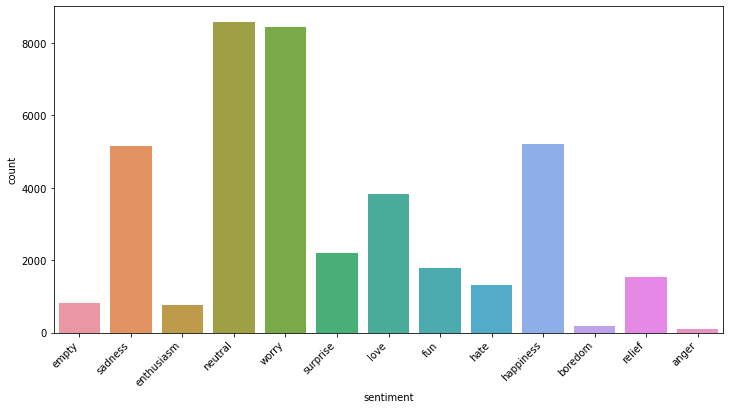

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data["sentiment"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [13]:
#introduce a new variable for the length of the corpus inside each document
data["length corpus"]=data.content.str.len()

Text(0.5, 0.98, 'Corpus length by sentiment')

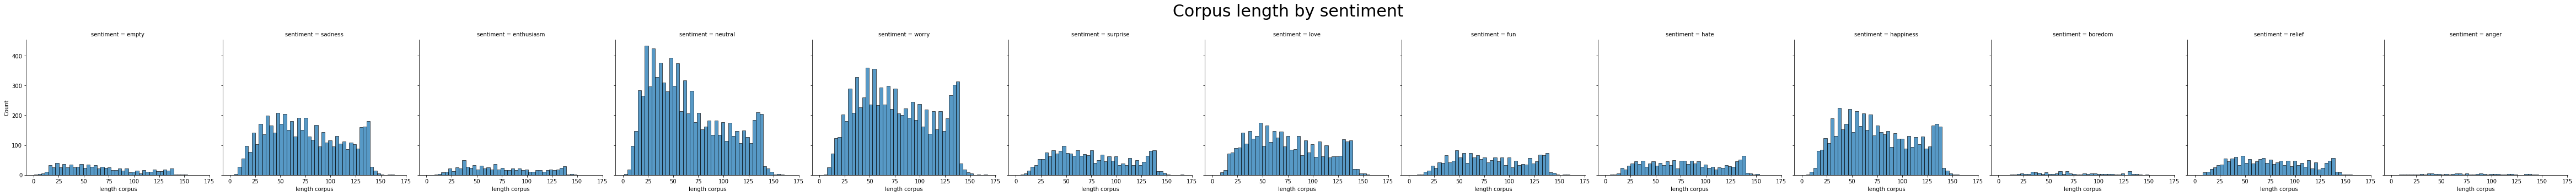

In [15]:
grafico1=sns.displot(data, x="length corpus",col="sentiment")
grafico1.fig.subplots_adjust(top=.8)
grafico1.fig.suptitle('Corpus length by sentiment', size=30)

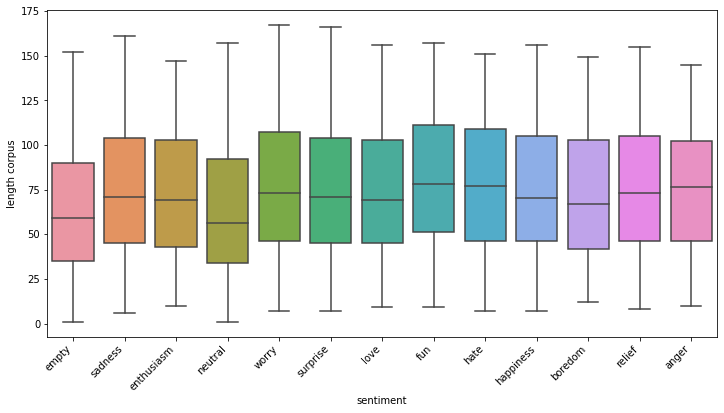

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x= "sentiment", y="length corpus", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [17]:
################################################################################################################################

In [18]:
#UNIGRAMS

<AxesSubplot:>

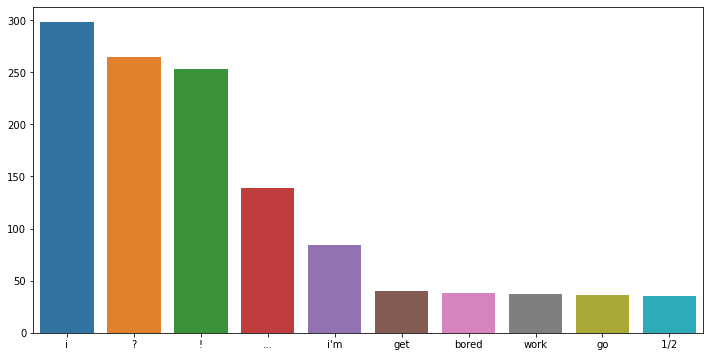

In [19]:
#empty
words=[word for i in data.tokens[data.sentiment=="empty"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)
plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

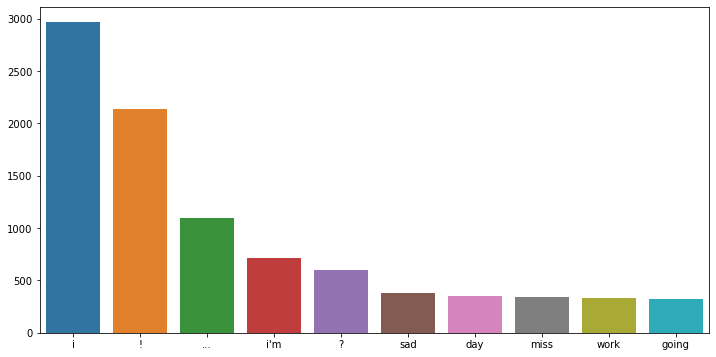

In [20]:
#sadness
words=[word for i in data.tokens[data.sentiment=="sadness"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)
  
plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

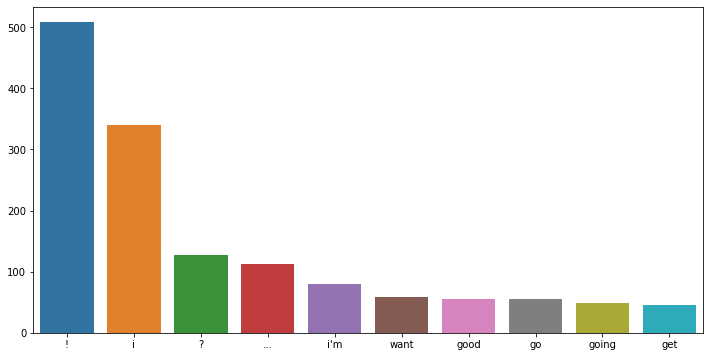

In [21]:
#enthusiasm
words=[word for i in data.tokens[data.sentiment=="enthusiasm"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

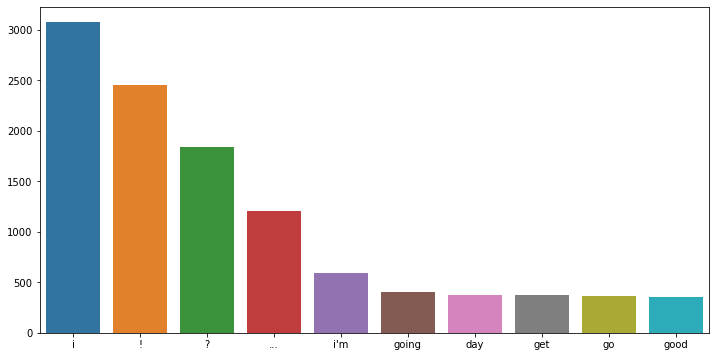

In [22]:
#neutral
words=[word for i in data.tokens[data.sentiment=="neutral"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

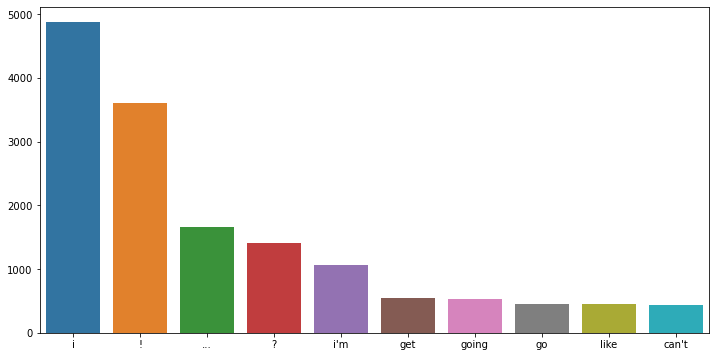

In [23]:
#worry
words=[word for i in data.tokens[data.sentiment=="worry"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

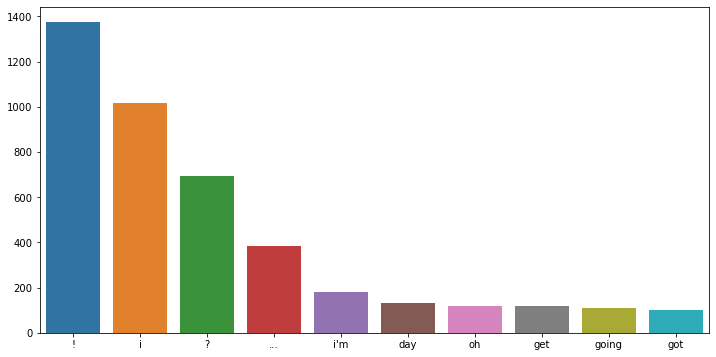

In [24]:
#surprise
words=[word for i in data.tokens[data.sentiment=="surprise"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

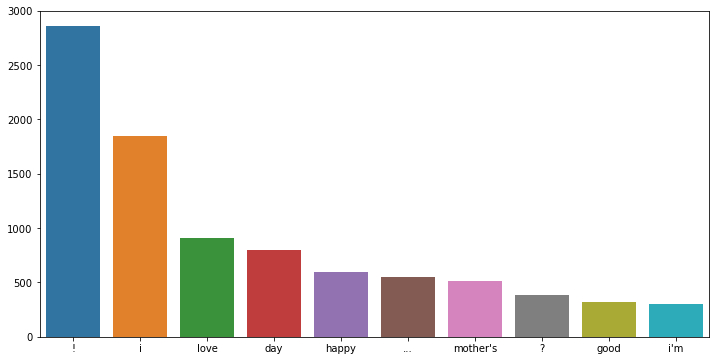

In [25]:
#love
words=[word for i in data.tokens[data.sentiment=="love"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

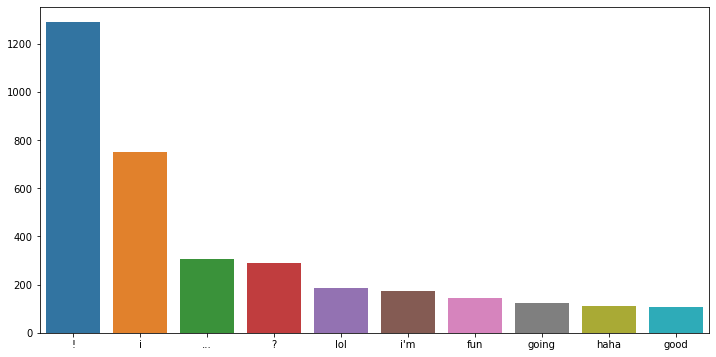

In [26]:
#fun
words=[word for i in data.tokens[data.sentiment=="fun"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

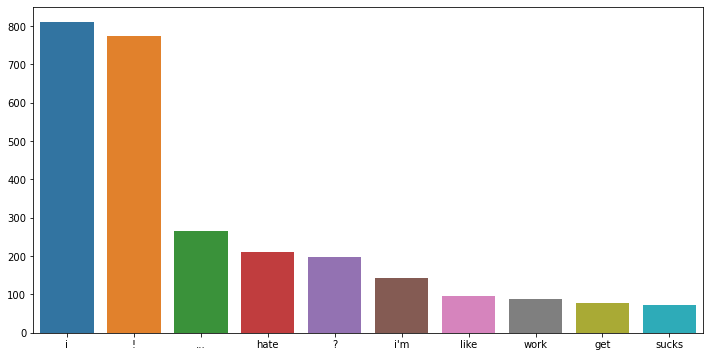

In [27]:
#hate
words=[word for i in data.tokens[data.sentiment=="hate"] for word in i] #non funziona perchè devo fare i token prima
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

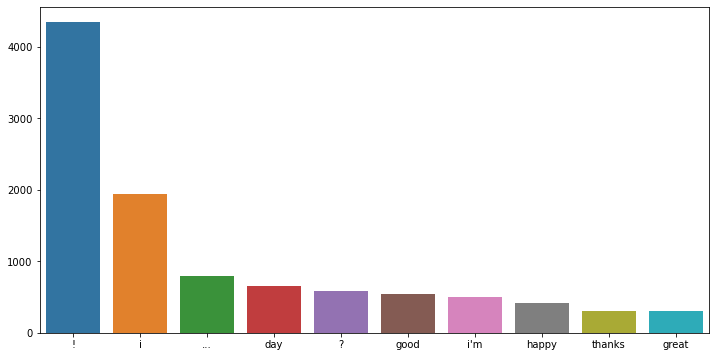

In [28]:
#happiness
words=[word for i in data.tokens[data.sentiment=="happiness"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

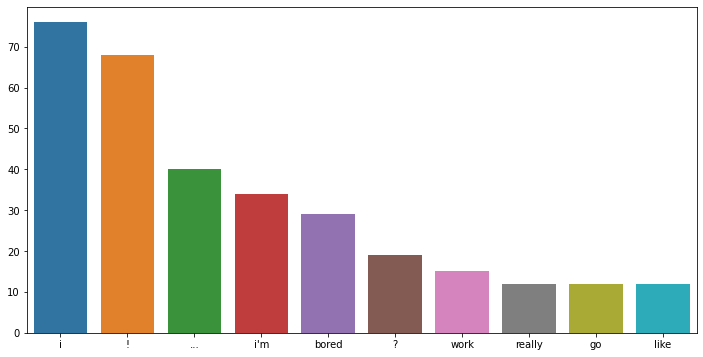

In [29]:
#boredom
words=[word for i in data.tokens[data.sentiment=="boredom"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

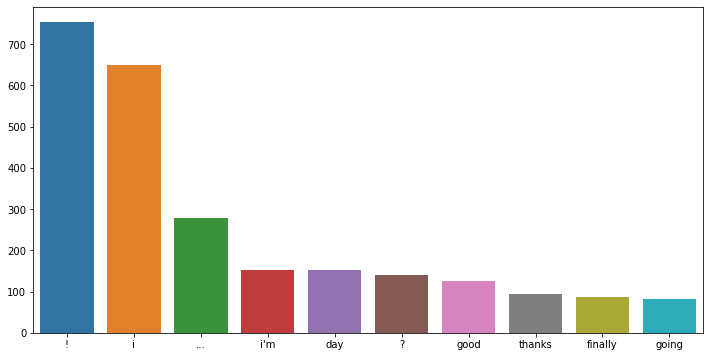

In [30]:
#relief
words=[word for i in data.tokens[data.sentiment=="relief"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

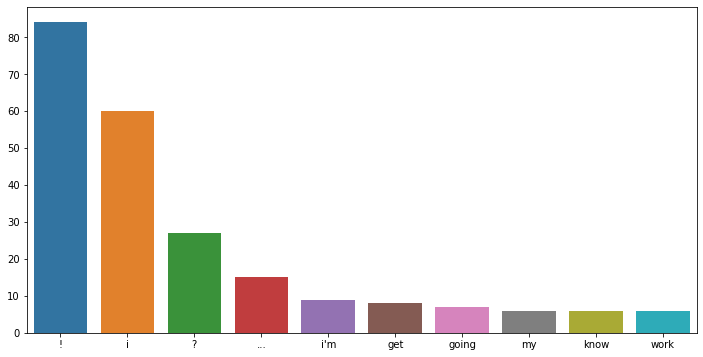

In [31]:
#anger
words=[word for i in data.tokens[data.sentiment=="anger"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

In [32]:
#BIGRAMS

In [40]:
#function to compute n-grams
def n_grams(corpus, n):
    matrix= CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bunch_of_words=matrix.transform(corpus)
    words_sum=bunch_of_words.sum(axis=0)
    words_freq=[(word, words_sum[0, indx])
                for word, indx in matrix.vocabulary_.items()]
    words_freq=sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

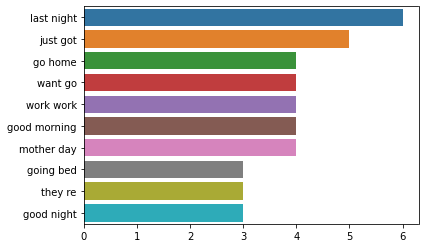

In [41]:
#empty
bigrams=n_grams(data.tokens[data.sentiment=="empty"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

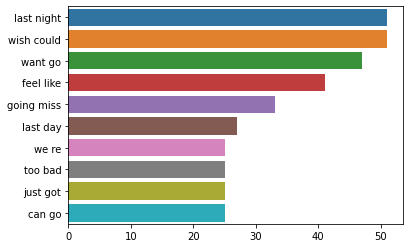

In [35]:
#sadness
bigrams=n_grams(data.tokens[data.sentiment=="sadness"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

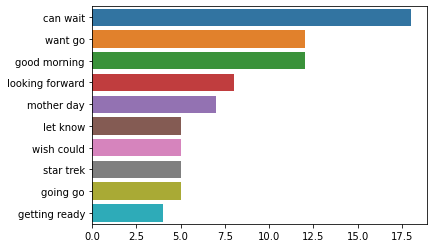

In [36]:
#enthusiasm
bigrams=n_grams(data.tokens[data.sentiment=="enthusiasm"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

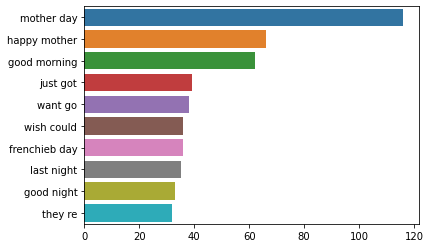

In [37]:
#neutral
bigrams=n_grams(data.tokens[data.sentiment=="neutral"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

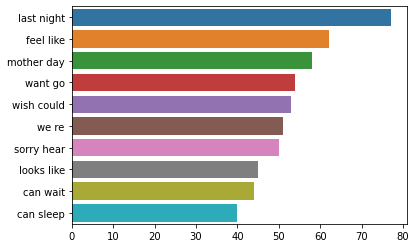

In [38]:
#worry
bigrams=n_grams(data.tokens[data.sentiment=="worry"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

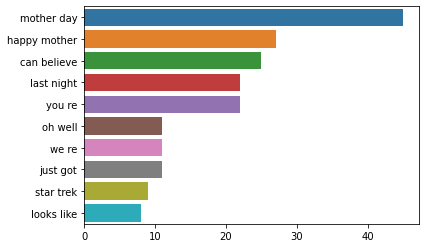

In [39]:
#surprise
bigrams=n_grams(data.tokens[data.sentiment=="surprise"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

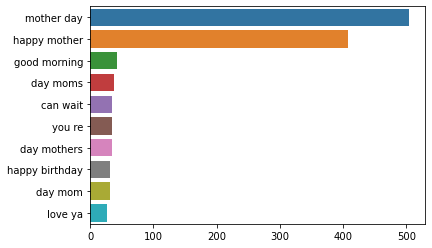

In [40]:
#love
bigrams=n_grams(data.tokens[data.sentiment=="love"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

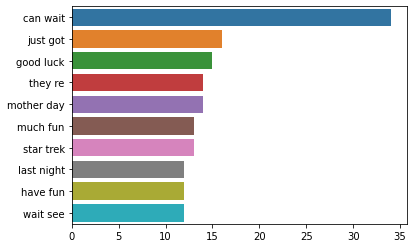

In [41]:
#fun
bigrams=n_grams(data.tokens[data.sentiment=="fun"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

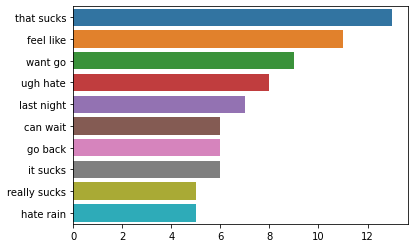

In [42]:
#hate
bigrams=n_grams(data.tokens[data["sentiment"]=="hate"].apply(" ".join), 2)

x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

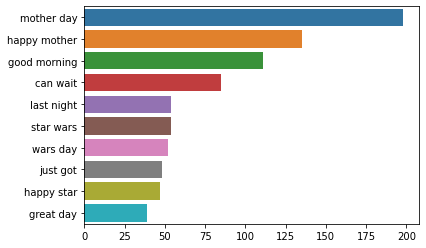

In [43]:
#happiness
bigrams=n_grams(data.tokens[data.sentiment=="happiness"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

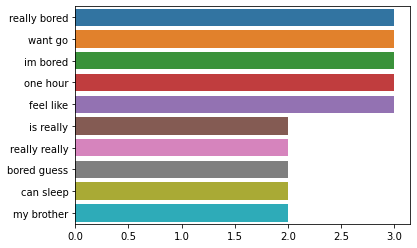

In [44]:
#boredom
bigrams=n_grams(data.tokens[data.sentiment=="boredom"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

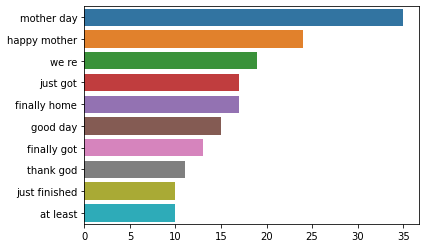

In [45]:
#relief
bigrams=n_grams(data.tokens[data.sentiment=="relief"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

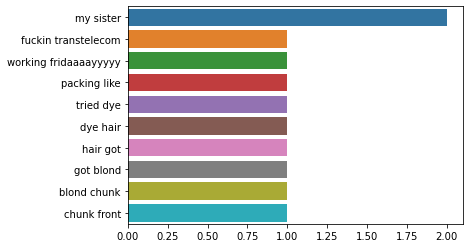

In [46]:
#anger
bigrams=n_grams(data.tokens[data.sentiment=="anger"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

In [47]:
#TRIGRAMS

<AxesSubplot:>

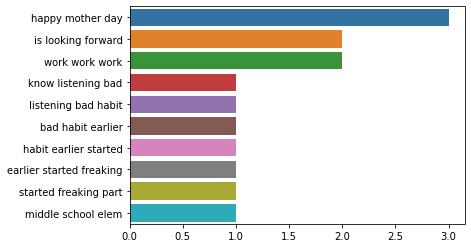

In [48]:
#empty
trigrams=n_grams(data.tokens[data.sentiment=="empty"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

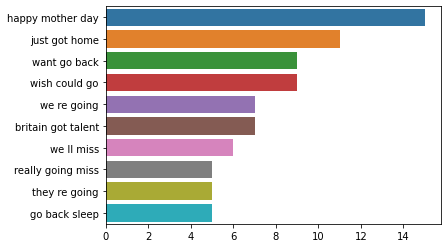

In [49]:
trigrams=n_grams(data.tokens[data.sentiment=="sadness"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

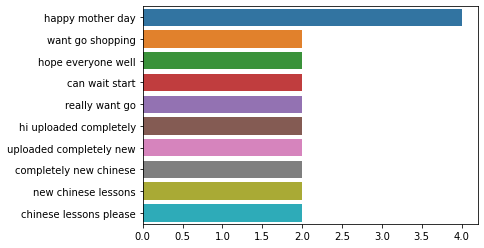

In [50]:
#enthusiasm
trigrams=n_grams(data.tokens[data.sentiment=="enthusiasm"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

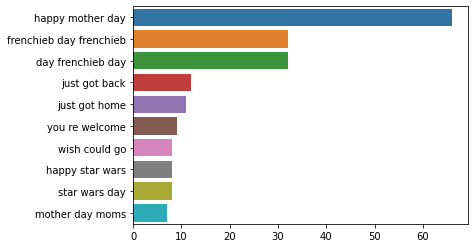

In [51]:
#neutral
trigrams=n_grams(data.tokens[data.sentiment=="neutral"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

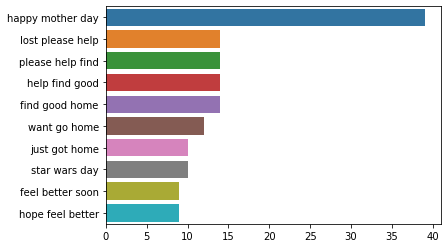

In [52]:
#worry
trigrams=n_grams(data.tokens[data.sentiment=="worry"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

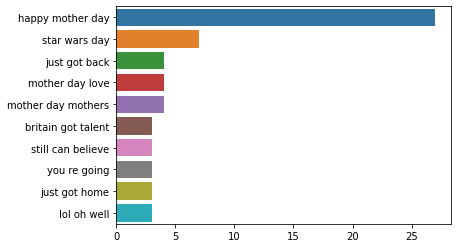

In [53]:
#surprise
trigrams=n_grams(data.tokens[data.sentiment=="surprise"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

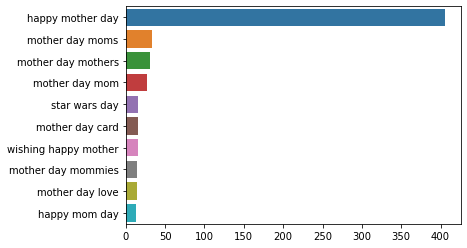

In [54]:
#love
trigrams=n_grams(data.tokens[data.sentiment=="love"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

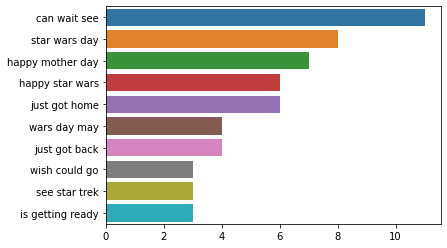

In [55]:
#fun
trigrams=n_grams(data.tokens[data.sentiment=="fun"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

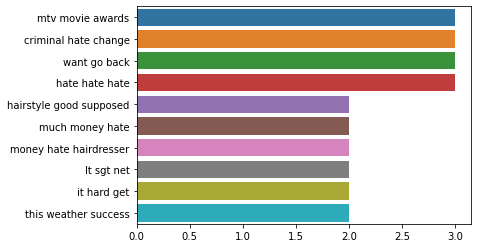

In [56]:
#hate
trigrams=n_grams(data.tokens[data["sentiment"]=="hate"].apply(" ".join), 3)

x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

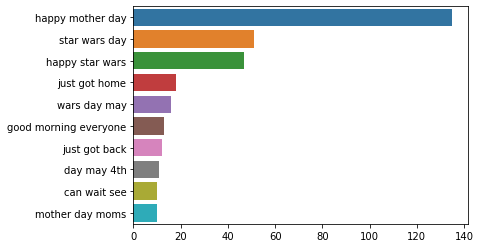

In [57]:
#happiness
trigrams=n_grams(data.tokens[data.sentiment=="happiness"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

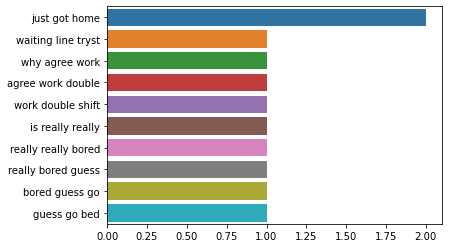

In [58]:
#boredom
trigrams=n_grams(data.tokens[data.sentiment=="boredom"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

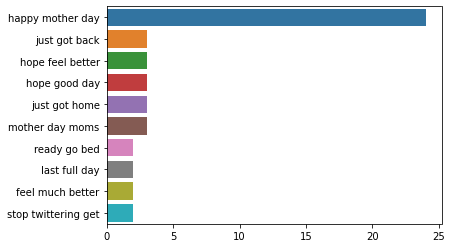

In [59]:
#relief
trigrams=n_grams(data.tokens[data.sentiment=="relief"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

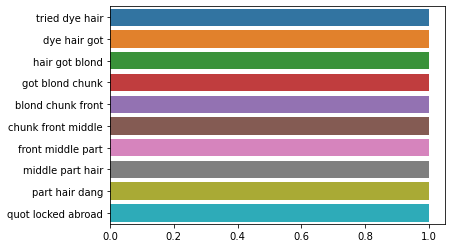

In [60]:
#anger
trigrams=n_grams(data.tokens[data.sentiment=="anger"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

In [61]:
################################################################################################################################

In [62]:
#LEMMATIZING TEXT

In [12]:
import nltk

lemma=WordNetLemmatizer()
lemmatized_words_verbs=[]
for s in data["tokens"]:
    lemmatized_sentence=[lemma.lemmatize(i, pos="v") for i in s]
    lemmatized_words_verbs.append(lemmatized_sentence)

lemmatized_words_verbs_nouns=[]
for s in lemmatized_words_verbs:
    lemmatized_sentence=[lemma.lemmatize(i, pos="n") for i in s]
    lemmatized_words_verbs_nouns.append(lemmatized_sentence)

lemmatized_words_verbs_nouns_adjectives=[]
for s in lemmatized_words_verbs_nouns:
    lemmatized_sentence=[lemma.lemmatize(i, pos="a") for i in s]
    lemmatized_words_verbs_nouns_adjectives.append(lemmatized_sentence)
    
lemmatized_words_verbs_nouns_adjectives_adverbs=[]
for s in lemmatized_words_verbs_nouns_adjectives:
    lemmatized_sentence=[lemma.lemmatize(i, pos="r") for i in s]
    lemmatized_words_verbs_nouns_adjectives_adverbs.append(lemmatized_sentence)
    
lemma_complete=[]
for s in lemmatized_words_verbs_nouns_adjectives_adverbs:
    lemmatized_sentence=[lemma.lemmatize(i, pos="s") for i in s]
    lemma_complete.append(lemmatized_sentence)



In [13]:
import nltk

lemma=WordNetLemmatizer()
lemmatized_words_verbs_nouns=[]
for s in data["tokens"]:
    lemmatized_sentence=[lemma.lemmatize(i, pos="n") for i in s]
    lemmatized_words_verbs_nouns.append(lemmatized_sentence)

lemmatized_words_verbs_nouns_adjectives=[]
for s in lemmatized_words_verbs_nouns:
    lemmatized_sentence=[lemma.lemmatize(i, pos="a") for i in s]
    lemmatized_words_verbs_nouns_adjectives.append(lemmatized_sentence)
    
lemmatized_words_verbs_nouns_adjectives_adverbs=[]
for s in lemmatized_words_verbs_nouns_adjectives:
    lemmatized_sentence=[lemma.lemmatize(i, pos="r") for i in s]
    lemmatized_words_verbs_nouns_adjectives_adverbs.append(lemmatized_sentence)
    
lemma_v=[]
for s in lemmatized_words_verbs_nouns_adjectives_adverbs:
    lemmatized_sentence=[lemma.lemmatize(i, pos="s") for i in s]
    lemma_v.append(lemmatized_sentence)

In [14]:
data["lemma complete"]=lemma_complete
document_complete = data["lemma complete"].str.join(" ")
list(document_complete)[0], list(document_complete)[2]

('i know i listen bad habit early i start freak part =[',
 'funeral ceremony ... gloomy friday ...')

In [15]:
data["lemma verbs"]=lemma_v
document_verbs = data["lemma verbs"].str.join(" ")
list(document_verbs)[0], list(document_verbs)[2]

('i know i listening bad habit early i started freaking part =[',
 'funeral ceremony ... gloomy friday ...')

In [16]:
data.head()

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                       content  \
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  layin n bed with a headache ughhhh...waitin on your call...   
2                                                          funeral ceremony...gloomy friday...   
3                                                         wants to hang out with friends soon!   
4       @dannycastillo we want to trade with someone who has houston tickets, but no one will.   

                                                                   sentence_corrected  \
0   I know I was listening to bad habit earlier and I started freaking at his part =[   
1                          Layin n bed with a headache, ugh...waiting on your call...   
2                                                 Funeral ceremony...gloomy Friday...   
3                                                Wants to hang out with friends soon!   
4             We want to trade with someone who has Houston tickets, but no one will.   

                                                                         tokens  \
0  [i, know, i, listening, bad, habit, earlier, i, started, freaking, part, =[]   
1                       [layin, n, bed, headache, ugh, ..., waiting, call, ...]   
2                                 [funeral, ceremony, ..., gloomy, friday, ...]   
3                                               [wants, hang, friends, soon, !]   
4                             [we, want, trade, someone, houston, tickets, one]   

                                                       lemma complete  \
0  [i, know, i, listen, bad, habit, early, i, start, freak, part, =[]   
1                [layin, n, bed, headache, ugh, ..., wait, call, ...]   
2                       [funeral, ceremony, ..., gloomy, friday, ...]   
3                                       [want, hang, friend, soon, !]   
4                    [we, want, trade, someone, houston, ticket, one]   

                                                                  lemma verbs  
0  [i, know, i, listening, bad, habit, early, i, started, freaking, part, =[]  
1                     [layin, n, bed, headache, ugh, ..., waiting, call, ...]  
2                               [funeral, ceremony, ..., gloomy, friday, ...]  
3                                               [want, hang, friend, soon, !]  
4                            [we, want, trade, someone, houston, ticket, one]

In [17]:
###############################################################################################################################

In [18]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import StandardScaler
tfidf = TfidfVectorizer(use_idf=True)
X_tfidf= tfidf.fit_transform(list(document_complete))
X_tfidf_array_complete = X_tfidf.toarray()
X_tfidf_array_complete.shape

(39925, 19993)

In [19]:
tfidf = TfidfVectorizer(use_idf=True)
X_tfidf= tfidf.fit_transform(list(document_verbs))
X_tfidf_array_verbs = X_tfidf.toarray()
X_tfidf_array_verbs.shape

(39925, 22133)

In [20]:
##################################################################################################################à

In [21]:
#FEATURE SELECTION

<AxesSubplot:ylabel='Count'>

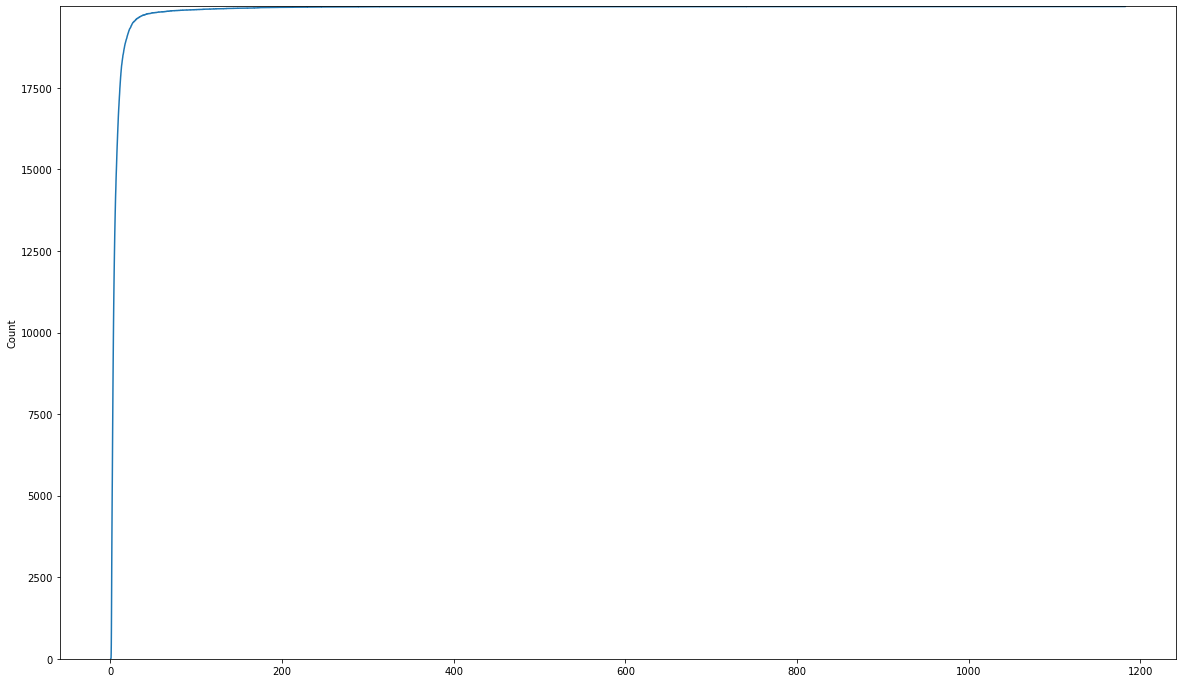

In [22]:
#CHI SQUARE
from sklearn.feature_selection import chi2
score, p_value=chi2(X_tfidf_array_complete, data["sentiment"].values)
plt.figure(figsize=(20,12))
sns.ecdfplot(score, stat="count")

<AxesSubplot:ylabel='Count'>

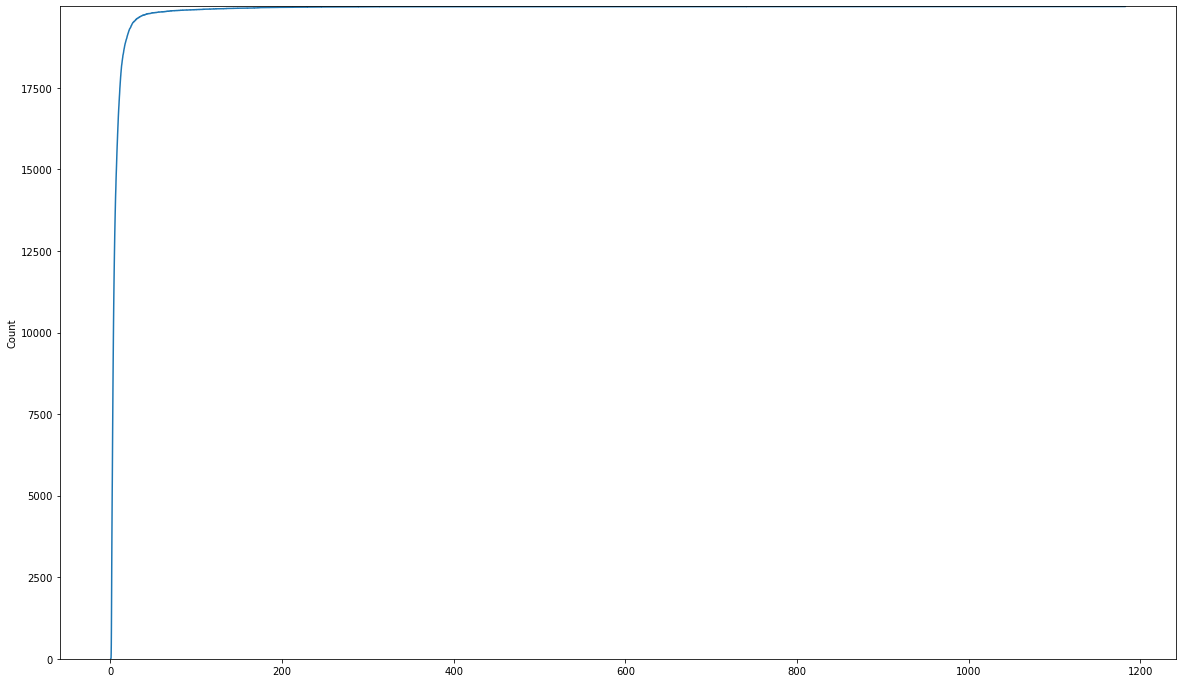

In [23]:
score2, p_value2=chi2(X_tfidf_array_verbs, data["sentiment"].values)
plt.figure(figsize=(20,12))
sns.ecdfplot(score, stat="count")

In [24]:
np.sum(np.array(score>7.1435).astype(int))   

5000

In [25]:
np.sum(np.array(score2>7.664).astype(int)) 

5000

In [26]:
#retrieve the indexes of the first 3000 most important words
index_most_important_words=[i for i,n in enumerate(score) if n > 7.1435]
index_most_important_words2=[i for i,n in enumerate(score2) if n > 7.664]

In [27]:
#data frame with all the most important words lemma complete
pd.set_option('display.max_rows', None)
most_important_words_10k=[tfidf.get_feature_names()[i] for i in index_most_important_words]
df_most_important_words_10k=pd.DataFrame(most_important_words_10k, columns=["word"])
df_most_important_words_10k

word
0                               00000000000
1                                        04
2                                        06
3                             0o0o0o00oring
4                                      1000
5                                     1000x
6                                       101
7                                      1017
8                                       109
9                                      10th
10                                      110
11                                     1100
12                                     1155
13                                     11am
14                                     11pm
15                                     11th
16                                      121
17                                      12p
18                                     12pm
19                                      135
20                                      136
21                                      138
22                                     14th
23                                     14yr
24                                     1500
25                                    15hrs
26                                      165
27                                    16lbs
28                                     16th
29                                       17
30                                     17lb
31                                     1800
32                                      190
33                                     1971
34                                     1987
35                                     1994
36                                     1999
37                                       1k
38                                      1mo
39                                      1pm
40                                       20
41                                     2003
42                                    20ish
43                                       22
44                                      222
45                                     2220
46                                      230
47                                      234
48                                     250e
49                                      262
50                                     26th
51                                       27
52                                     2833
53                                      286
54                                      28c
55                                      291
56                                       2d
57                                    2hear
58                                     2hrs
59                                    2jobs
60                                       2k
61                                       2l
62                                    2moro
63                                  2morrow
64                                      2mz
65                                     2nyt
66                                     2w2v
67                                      30p
68                                     30pm
69                                     30th
70                                       33
71                                      330
72                                      333
73                                     3333
74                                       35
75                                      350
76                                       36
77                                     3647
78                                      395
79                            3breakupwords
80                                      3bt
81                                       3g
82                                    3indi
83                                      3mb
84                                      3pm
85                                      3x3
86                                     4000
87                                    400mb
88                                      401
89                                      409
90                                 

In [28]:
#data frame with all the most important words lemma without verbs
pd.set_option('display.max_rows', None)
most_important_words_verbs=[tfidf.get_feature_names()[i] for i in index_most_important_words2]
df_most_important_words_verbs=pd.DataFrame(most_important_words_verbs, columns=["word"])
df_most_important_words_verbs

word
0                                                        00000000000
1                                                                 04
2                                                                 06
3                                                      0o0o0o00oring
4                                                               1000
5                                                              1000x
6                                                                101
7                                                               1017
8                                                                109
9                                                               10th
10                                                               110
11                                                              1100
12                                                              1155
13                                                              11am
14                                                              11pm
15                                                              11th
16                                                               121
17                                                              12pm
18                                                               135
19                                                               136
20                                                              14th
21                                                             15hrs
22                                                               165
23                                                             16lbs
24                                                              16th
25                                                                17
26                                                              1800
27                                                               190
28                                                              1971
29                                                              1987
30                                                              1994
31                                                              1999
32                                                                1k
33                                                               1mo
34                                                               1pm
35                                                                20
36                                                              2003
37                                                             20ish
38                                                                22
39                                                               222
40                                                              2220
41                                                               230
42                                                              250e
43                                                               262
44                                                              26th
45                                                                27
46                                                              2833
47                                                               286
48                                                               28c
49                                                               291
50                                                                2d
51                                                             2hear
52                                                                2k
53                                                                2l
54                                                             2moro
55                                                           2morrow
56                                                               2mz
57                                                            

In [29]:
pos=nltk.pos_tag(most_important_words_10k)
pos1=nltk.pos_tag(most_important_words_verbs)

In [30]:
from collections import Counter
counts = Counter(tag for word,tag in pos)
counts

Counter({'CD': 139,
         'VBG': 314,
         'JJ': 911,
         'NN': 2579,
         'VBZ': 36,
         'IN': 57,
         'NNS': 189,
         'RB': 154,
         'VBP': 174,
         'VBD': 261,
         'VB': 29,
         'VBN': 93,
         'DT': 6,
         'RBS': 1,
         'CC': 2,
         'MD': 6,
         'FW': 17,
         'JJS': 7,
         'RBR': 4,
         'JJR': 5,
         'PRP': 3,
         'PRP$': 2,
         'EX': 1,
         'NNP': 10})

In [31]:
counts1 = Counter(tag for word,tag in pos1)
counts1

Counter({'CD': 123,
         'VBG': 320,
         'JJ': 955,
         'NN': 2512,
         'VBZ': 42,
         'IN': 44,
         'RB': 180,
         'NNS': 136,
         'VBP': 143,
         'VBN': 102,
         'VBD': 284,
         'RP': 5,
         'VB': 38,
         'DT': 7,
         'JJS': 11,
         'CC': 5,
         'MD': 5,
         'JJR': 7,
         'FW': 14,
         'RBR': 9,
         'PRP': 6,
         'NNP': 41,
         'PRP$': 1,
         'WDT': 2,
         'WRB': 5,
         'WP': 2,
         'UH': 1})

In [40]:
unique_pos=np.unique(list(counts.keys())+list(counts1.keys()))
unique_pos
new_dict_counts={}
for i in unique_pos:
    if i in counts.keys() and i in counts1.keys():
        new_dict_counts[i]=[counts[i], counts1[i]]
    elif i in counts.keys() and i not in counts1.keys():
        new_dict_counts[i]=[counts[i], 0]
    elif i not in counts.keys() and i in counts1.keys():
        new_dict_counts[i]=[0, counts1[i]]
        
new_dict_counts


{'CC': [2, 5],
 'CD': [139, 123],
 'DT': [6, 7],
 'EX': [1, 0],
 'FW': [17, 14],
 'IN': [57, 44],
 'JJ': [911, 955],
 'JJR': [5, 7],
 'JJS': [7, 11],
 'MD': [6, 5],
 'NN': [2579, 2512],
 'NNP': [10, 41],
 'NNS': [189, 136],
 'PRP': [3, 6],
 'PRP$': [2, 1],
 'RB': [154, 180],
 'RBR': [4, 9],
 'RBS': [1, 0],
 'RP': [0, 5],
 'UH': [0, 1],
 'VB': [29, 38],
 'VBD': [261, 284],
 'VBG': [314, 320],
 'VBN': [93, 102],
 'VBP': [174, 143],
 'VBZ': [36, 42],
 'WDT': [0, 2],
 'WP': [0, 2],
 'WRB': [0, 5]}

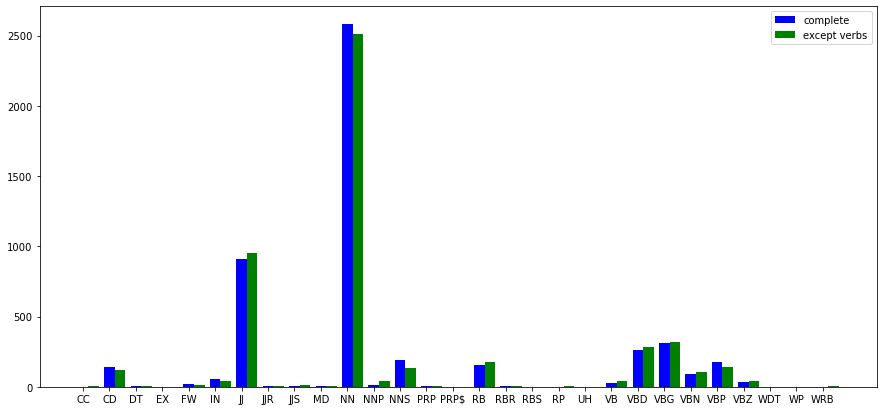

In [86]:
keys = [key for key in new_dict_counts.keys()]
values = [value for value in new_dict_counts.values()]
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values],
       width=0.4, color='b', align='edge')
ax.bar(np.arange(len(keys)) + 0.2,
       [value[1] if len(value) == 2 else 0 for value in values],
       width=0.4, color='g', align='edge')
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.legend(labels=['complete', 'except verbs'])
plt.show()

In [75]:
#new tfidf array with the most important words
X_tfidf_array_complete_5k=X_tfidf_array_complete[:,index_most_important_words ]
X_tfidf_array_verbs_5k=X_tfidf_array_verbs[:,index_most_important_words2 ]
np.shape(X_tfidf_array_complete_5k), np.shape(X_tfidf_array_verbs_5k)

((39925, 5000), (39925, 5000))

In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [ ]:
#CLASSIFICATION

In [76]:
#TRAINING AND TEST SET 
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf_array_complete_5k, data["sentiment"].values, train_size=0.80, stratify=data["sentiment"], random_state=42)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_tfidf_array_verbs_5k, data["sentiment"].values, train_size=0.80, stratify=data["sentiment"], random_state=42)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
#SVM GAUSSIAN KERNEL  LEMMA VERBS
from sklearn import svm

training_errors=[]
test_errors=[]
best_score=0
best_model=''
for i in [0.1, 0.5, 1, 2, 3]:
    svm_model=svm.SVC(C=i, kernel="rbf", gamma=0.25).fit(X_train1, Y_train1)
    predictions_train=svm_model.predict(X_train1)
    predictions_test=svm_model.predict(X_test1)
    train_accuracy=accuracy_score(Y_train1, predictions_train)
    test_accuracy=accuracy_score(Y_test1, predictions_test)
    training_errors.append(1-train_accuracy)
    test_errors.append(1-test_accuracy)
    if test_accuracy > best_score:
        best_model=svm_model
        best_score=test_accuracy
        
    print(f"gamma: {i}")
    print(f"training error: {1-train_accuracy}")
    print(f"test error: {1-test_accuracy}")
    print("----------------------------------------------------------------")

gamma: 0.1
training error: 0.7193174702567313
test error: 0.7281152160300564
----------------------------------------------------------------
gamma: 0.5
training error: 0.6472448340638697
test error: 0.6727614276768942
----------------------------------------------------------------
gamma: 1
training error: 0.621947401377583
test error: 0.6554790231684409
----------------------------------------------------------------
gamma: 2
training error: 0.5909517845961177
test error: 0.6447088290544771
----------------------------------------------------------------
gamma: 3
training error: 0.5584846587351284
test error: 0.6396994364433313
----------------------------------------------------------------


In [79]:
from sklearn import svm
svm_model_optimal1=svm.SVC(C=3, kernel="rbf", gamma=0.5).fit(X_train1, Y_train1)

predictions_train_optimal1=svm_model_optimal1.predict(X_train1)
predictions_test_optimal1=svm_model_optimal1.predict(X_test1)
train_accuracy_optimal1=accuracy_score(Y_train1, predictions_train_optimal1)
test_accuracy_optimal1=accuracy_score(Y_test1, predictions_test_optimal1)


print(f"training error: {1-train_accuracy_optimal1}")
print(f"test error: {1-test_accuracy_optimal1}")

NameError: name 'svm_model' is not defined

In [84]:
print(f"training error: {1-train_accuracy_optimal1}")
print(f"test error: {1-test_accuracy_optimal1}")

training error: 0.45319348778960555
test error: 0.6330619912335629


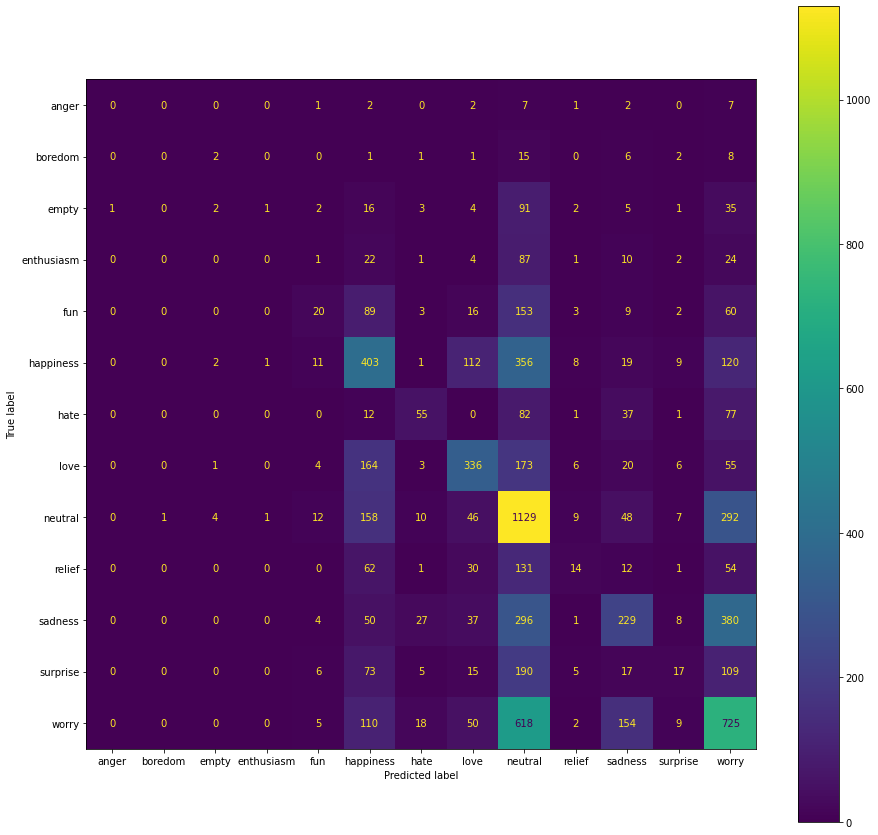

In [82]:
fig, ax = plt.subplots(figsize=(15,15))
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test1, predictions_test_optimal1), display_labels=svm_model_optimal1.classes_)
disp.plot(ax=ax)
plt.show()

In [39]:
#SVM GAUSSIAN KERNEL  LEMMA COMPLETE
from sklearn import svm

training_errors=[]
test_errors=[]
best_score=0
best_model=''
for i in [0.1, 0.5, 1, 2, 3]:
    svm_model=svm.SVC(C=i, kernel="rbf", gamma=0.25).fit(X_train, Y_train)
    predictions_train=svm_model.predict(X_train)
    predictions_test=svm_model.predict(X_test)
    train_accuracy=accuracy_score(Y_train, predictions_train)
    test_accuracy=accuracy_score(Y_test, predictions_test)
    training_errors.append(1-train_accuracy)
    test_errors.append(1-test_accuracy)
    if test_accuracy > best_score:
        best_model=svm_model
        best_score=test_accuracy
        
    print(f"regularization: {i}")
    print(f"training error: {1-train_accuracy}")
    print(f"test error: {1-test_accuracy}")
    print("----------------------------------------------------------------")

regularization: 0.1
training error: 0.7094239198497182
test error: 0.7212273011897308
----------------------------------------------------------------
regularization: 0.5
training error: 0.6405760801502818
test error: 0.6681277395115842
----------------------------------------------------------------
regularization: 1
training error: 0.6154038822792736
test error: 0.6515967438948027
----------------------------------------------------------------
regularization: 2
training error: 0.5834376956793988
test error: 0.6440826549780839
----------------------------------------------------------------
regularization: 3
training error: 0.5491859737006888
test error: 0.6435817157169693
----------------------------------------------------------------


In [83]:
from sklearn import svm
svm_model_optimal2=svm.SVC(C=3, kernel="rbf", gamma=0.5).fit(X_train, Y_train)

predictions_train_optimal2=svm_model_optimal2.predict(X_train)
predictions_test_optimal2=svm_model_optimal2.predict(X_test)
train_accuracy_optimal2=accuracy_score(Y_train, predictions_train_optimal2)
test_accuracy_optimal2=accuracy_score(Y_test, predictions_test_optimal2)


print(f"training error: {1-train_accuracy_optimal2}")
print(f"test error: {1-test_accuracy_optimal2}")

training error: 0.430463368816531
test error: 0.6375704445835942


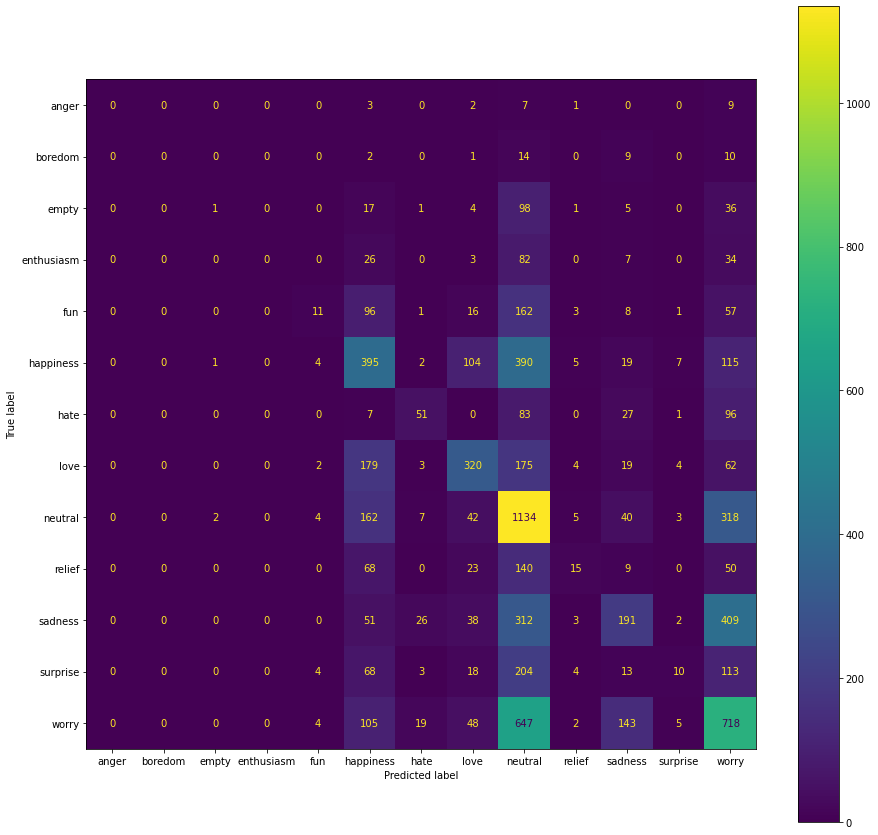

In [40]:
Y_test_prediction=best_model.predict(X_test)
fig, ax = plt.subplots(figsize=(15,15))
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_prediction), display_labels=best_model.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
############################################################################################################################

In [ ]:
################################################################################################################################
################################################################################################################################
################################################################################################################################

In [89]:
#Let's introduce the movies
data.head()

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                       content  \
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  layin n bed with a headache ughhhh...waitin on your call...   
2                                                          funeral ceremony...gloomy friday...   
3                                                         wants to hang out with friends soon!   
4       @dannycastillo we want to trade with someone who has houston tickets, but no one will.   

                                                                   sentence_corrected  \
0   I know I was listening to bad habit earlier and I started freaking at his part =[   
1                          Layin n bed with a headache, ugh...waiting on your call...   
2                                                 Funeral ceremony...gloomy Friday...   
3                                                Wants to hang out with friends soon!   
4             We want to trade with someone who has Houston tickets, but no one will.   

                                                                         tokens  \
0  [i, know, i, listening, bad, habit, earlier, i, started, freaking, part, =[]   
1                       [layin, n, bed, headache, ugh, ..., waiting, call, ...]   
2                                 [funeral, ceremony, ..., gloomy, friday, ...]   
3                                               [wants, hang, friends, soon, !]   
4                             [we, want, trade, someone, houston, tickets, one]   

                                                       lemma complete  \
0  [i, know, i, listen, bad, habit, early, i, start, freak, part, =[]   
1                [layin, n, bed, headache, ugh, ..., wait, call, ...]   
2                       [funeral, ceremony, ..., gloomy, friday, ...]   
3                                       [want, hang, friend, soon, !]   
4                    [we, want, trade, someone, houston, ticket, one]   

                                                                  lemma verbs  
0  [i, know, i, listening, bad, habit, early, i, started, freaking, part, =[]  
1                     [layin, n, bed, headache, ugh, ..., waiting, call, ...]  
2                               [funeral, ceremony, ..., gloomy, friday, ...]  
3                                               [want, hang, friend, soon, !]  
4                            [we, want, trade, someone, houston, ticket, one]

In [90]:
ReservoirDogs=pd.read_csv("C:/Users/Stefano/Desktop/DSE/TEXT MINING/PROGETTO/DATASET/LeIene.csv")
ReservoirDogs.head()

SPEAKER  \
0  MR. BLONDE   
1         COP   
2  MR. BLONDE   
3  MR. BLONDE   
4         COP   

                                                                                                                                                                                                                                                                                                                                              TEXT  \
0  Now I'm not gonna bullshit you. I don't really care about what you know or don't know. I'm gonna torture you for awhile regardless. Not to get information, but because torturing a cop amuses me. There's nothing you can say, I've heard it all before. There's nothing you can do. Except pray for a quick death, which you ain't gonna get.   
1                                                                                                                                                                                                                                                                                                                                             Yes.   
2                                                                                                                                                                                                                                                                                                I asked you a question. Are you clear about that?   
3                                                                                                                                                                                                                                                                                        First off, I don't have a boss. Are you clear about that?   
4                                                                                                                                                                                                                                                                                                       Your boss even said there wasn't a set up.   

    LESTENING  
0         COP  
1  MR. BLONDE  
2         NaN  
3         COP  
4  MR. BLONDE

In [91]:
new_cols=["SPEAKER", "LESTENING", "TEXT"]
ReservoirDogs=ReservoirDogs[new_cols]
ReservoirDogs=ReservoirDogs.reindex(columns=new_cols)
ReservoirDogs.head()

SPEAKER   LESTENING  \
0  MR. BLONDE         COP   
1         COP  MR. BLONDE   
2  MR. BLONDE         NaN   
3  MR. BLONDE         COP   
4         COP  MR. BLONDE   

                                                                                                                                                                                                                                                                                                                                              TEXT  
0  Now I'm not gonna bullshit you. I don't really care about what you know or don't know. I'm gonna torture you for awhile regardless. Not to get information, but because torturing a cop amuses me. There's nothing you can say, I've heard it all before. There's nothing you can do. Except pray for a quick death, which you ain't gonna get.  
1                                                                                                                                                                                                                                                                                                                                             Yes.  
2                                                                                                                                                                                                                                                                                                I asked you a question. Are you clear about that?  
3                                                                                                                                                                                                                                                                                        First off, I don't have a boss. Are you clear about that?  
4                                                                                                                                                                                                                                                                                                       Your boss even said there wasn't a set up.

In [92]:
ReservoirDogs.shape

(465, 3)

In [93]:
ReservoirDogs=ReservoirDogs.rename(columns={"SPEAKER":"tweet_id", "LESTENING":"sentiment", "TEXT":"content"})
data=data.append(ReservoirDogs)
data.tail()
#ReservoirDogs.head()

tweet_id  sentiment  \
460   MR. PINK  MR. WHITE   
461  MR. WHITE        NaN   
462   MR. PINK  MR. WHITE   
463  MR. WHITE   MR. PINK   
464   MR. PINK        NaN   

                                                                                                                                                                                                             content  \
460                                                                                                                                                                                                   Fuck all that.   
461                    Waitressing is the number one occupation for female non-college graduates in this country. It's the one job basically any woman can get, and make a living on. The reason is because of tips.   
462  So's working at McDonald's, but you don't feel the need to tip them. They're servin' ya food, you should tip em. But no, society says tip these guys over here, but not those guys over there. That's bullshit.   
463                                                                                                              You don't have any idea what you're talking about. These people bust their ass. This is a hard job.   
464                                                                                                                     Do you know what this is? It's the world's smallest violin, playing just for the waitresses.   

    sentence_corrected tokens lemma complete lemma verbs  
460                NaN    NaN            NaN         NaN  
461                NaN    NaN            NaN         NaN  
462                NaN    NaN            NaN         NaN  
463                NaN    NaN            NaN         NaN  
464                NaN    NaN            NaN         NaN

In [95]:
#data.iloc[39925:,:]["content"] 
data.shape

(40390, 7)

In [96]:
#data.iloc[39925:,:] il dati da le iene in poi
import re
#nltk.download('punkt')
index_exceptions=[]
sentence_corrected=[]
for index,sentence in enumerate(data.iloc[39925:,:]["content"]):
    sentence=re.sub("(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])", "", sentence)
    sentence=re.sub("/(?:(?:https?|ftp|file):\/\/|www\.|ftp\.)(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[-A-Z0-9+&@#\/%=~_|$?!:,.])*(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[A-Z0-9+&@#\/%=~_|$])/igm", "", sentence) #forse è superfluo
    sentence=re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", sentence)
    sentence=re.sub(r"@\S+", "",sentence)
    try:
        sentence=tool.correct(sentence)
    except:
        index_exceptions.append(index)
        pass
    sentence_corrected.append(sentence)
data.iloc[39925:,:]["sentence_corrected"]=sentence_corrected
data.iloc[39925:,:]

tweet_id       sentiment  \
0        MR. BLONDE             COP   
1               COP      MR. BLONDE   
2        MR. BLONDE             NaN   
3        MR. BLONDE             COP   
4               COP      MR. BLONDE   
5        MR. BLONDE             COP   
6               COP      MR. BLONDE   
7        MR. BLONDE      MR. BLONDE   
8        MR. BLONDE             NaN   
9             EDDIE             VIC   
10              VIC             NaN   
11              VIC           EDDIE   
12            EDDIE             VIC   
13              VIC           EDDIE   
14            EDDIE             VIC   
15              VIC             NaN   
16            EDDIE             VIC   
17              VIC           EDDIE   
18            EDDIE             VIC   
19              VIC           EDDIE   
20            EDDIE             VIC   
21              VIC             NaN   
22              VIC           EDDIE   
23            EDDIE             VIC   
24              VIC           EDDIE   
25            EDDIE             VIC   
26              VIC           EDDIE   
27            EDDIE             NaN   
28            EDDIE       MR. WHITE   
29        MR. WHITE             NaN   
30        MR. WHITE           EDDIE   
31            EDDIE             NaN   
32        MR. WHITE           EDDIE   
33            EDDIE             NaN   
34        MR. WHITE           EDDIE   
35            EDDIE             NaN   
36            EDDIE       MR. WHITE   
37        MR. WHITE           EDDIE   
38            EDDIE       MR. WHITE   
39        MR. WHITE           EDDIE   
40            EDDIE             NaN   
41            EDDIE       MR. WHITE   
42        MR. WHITE           EDDIE   
43            EDDIE       MR. WHITE   
44        MR. WHITE           EDDIE   
45            EDDIE             NaN   
46        MR. WHITE           EDDIE   
47            EDDIE             NaN   
48              JOE           EDDIE   
49            EDDIE             NaN   
50            EDDIE             JOE   
51              JOE           EDDIE   
52            EDDIE             NaN   
53            EDDIE             JOE   
54              JOE             NaN   
55            EDDIE             JOE   
56              JOE             NaN   
57            EDDIE             JOE   
58              JOE             NaN   
59            EDDIE             JOE   
60              JOE           EDDIE   
61            EDDIE             NaN   
62            EDDIE        MR. PINK   
63         MR. PINK             NaN   
64            EDDIE        MR. PINK   
65         MR. PINK        MR. PINK   
66         MR. PINK           EDDIE   
67            EDDIE        MR. PINK   
68         MR. PINK           EDDIE   
69            EDDIE        MR. PINK   
70         MR. PINK             NaN   
71            EDDIE        MR. PINK   
72         MR. PINK             NaN   
73            EDDIE        MR. PINK   
74         MR. PINK           EDDIE   
75            EDDIE             NaN   
76            EDDIE        MR. PINK   
77         MR. PINK           EDDIE   
78            EDDIE        MR. PINK   
79         MR. PINK           EDDIE   
80            EDDIE             NaN   
81            EDDIE        MR. PINK   
82         MR. PINK             NaN   
83            EDDIE        MR. PINK   
84         MR. PINK           EDDIE   
85            EDDIE        MR. PINK   
86         MR. PINK           EDDIE   
87            EDDIE        MR. PINK   
88         MR. PINK           EDDIE   
89            EDDIE        MR. PINK   
90         MR. PINK           EDDIE   
91            EDDIE        MR. PINK   
92         MR. PINK             NaN   
93           FREDDY        HOLDAWAY   
94         HOLDAWAY             NaN   
95         HOLDAWAY          FREDDY   
96           FREDDY        HOLDAWAY   
97         HOLDAWAY          FREDDY   
98           FREDDY        HOLDAWAY   
99         HOLDAWAY          FREDDY   
100          FREDDY        HOLDAWAY   
101        HOLDAWAY          FRED

In [97]:
#dictionary with a lot of corrected words

replacers = {'dm': ' direct message ',
 'thx': ' thanks ',
 'amf': ' goodbye my friend ',
 'dming': ' direct messaging ',
 'dmed': ' direct messaged ',
 'plz': ' please ',
 'u': ' you ',
 'asap': ' as soon as possible ',
 'r':' are ',
 'bf':' boyfriend ',
 'gf': ' girlfriend ',
 'n':' in ',
 'ab':' about ',
 'abt':' about ',
 'attwaction': ' attraction ',
 'b/c':' because ',
 'b':' be ',
 'bc': ' because ',
 "bcoz": " because ",
 'bday': ' birth day ',
 'becuz': ' because ',
 'b4':' before ',
 'bfn':' bye for now ',
 'bgd': ' background ',
 'br': ' best regards ',
 'bs': ' bullshit ',
 'btw': ' by the way ',
 'bulltwit': ' bullshit ',
 'chk': ' check ',
 'cld': ' could ',
 'clk': ' click ',
 'cre8': ' create ',
 'cpu': ' central processing unit ',
 'cuz': ' cause ',
 'da': ' the ',
 'deets': ' details ',
 'dnt': ' do not ',
 'em': ' them ',
 'eml': ' email ',
 'ema': ' email address ',
 'enuff': ' enough ',
 'f2f': ' face to face ',
 'fab': ' fabulous ',
 'fanclub': ' fan club ',
 'fomo': ' fear of missing out ',
 'fridaaaayyyyy': ' friday ',
 'ftl': ' for the loss ',
 'ftw': ' for the win ',
 'fukn': ' fucking ',
 'gr8': ' greate ',
 'goood': ' good ',
 'gooood': ' good ',
 'goooood': ' good ',
 'goodgirl': ' good girl ',
 'gt': ' good try ',        #
 'gpu': 'graphics processing unit',
 'ht': ' hat tip ',
 'hii': ' hi ',
 'hiii': ' hi ',
 'hiphop': ' hip  hop ',
 'homeee': ' home ',
 'homeeee': ' home ',
 'hrs': ' hours ',
 'ic': ' i see ',
 'icymi': ' in case you missed it ',
 'idont': ' i do not ',
 'idk': ' i do not know ',
 'idkk': ' i do not know ',
 'ikr': ' i know, right ',
 'im': ' i am ',
 'imo': ' in my opinion ',
 'ily': ' i love you ',
 'kk': ' okay ',
 'l.a.': ' los angeles ',
 'lmao': ' laughing my ass off ',
 'lmk': ' let me know ',
 'll': ' will ',
 'loooved': ' loved ',
 'loosing': ' losing ',
 'm': ' am ',
 'maaan': ' man ',
 'maaaan': ' man ',
 'maaaaan': ' man ',
 'maaaaaan': ' man ',
 'meee': ' me ',
 'meeee': ' me ',
 'meeeee': ' me ',
 'muahahaha': ' i am laughing ',
 'mr': ' mister ',
 'mr.': ' mister ',
 'nvm': ' never mind ',
 'nyc': ' new york city ',
 'ofc': ' of course ',
 'omg': ' oh my god ',
 'omfg': ' oh my fucking god ',
 'pc': ' laptop ',
 'pm': ' after midday ',
 'pls': ' please ',
 'rofl': ' I am rolling on floor laughing ',
 'sooo': ' so ',
 'soooo': ' so ',
 'sooooo': ' so ',
 'soooooo': ' so ',
 'sooooooo': ' so ',
 'srsly': ' seriously ',
 'stfu': ' shut the fuck up ',
 'smh': ' shaking my head ',
 'some1': ' someone ',
 'sp': ' sponsored ',
 'tbh': ' to be honest ',
 'tbt': ' throwback thursday ',
 'tftf': ' thanks for the follow ',
 'thatsmee': ' that is me ',
 'tmb': ' reply me back ',
 'tmrw': ' tomorrow ',
 'tv': ' television ',
 'twabulous': ' fabulous ',
 'twalking': ' walking ',
 'twaffic': ' twitter traffic ',
 'twart': ' art ',
 'tweeple': ' people ',
 'tweetorial': ' tutorial ',
 'tweetroduce': ' introduce ',
 'tweetsult': ' insult ',
 'twettiquette': ' etiquette ',
 'twewbie': ' newbie ',           
 "waaalkiiing": "walking",
 "waaaaayyyyy": "way",
 "waaaaaay": "way",
 "waaaaaaaaahhhh": "wah",
 "waaaaaaaaaah": "wah",
 "waaaaaaa": "wah",
 "wahooooooo": "wow",
 'woz': ' was ',
 'wasnt': ' was not ',
 'wtf': ' what the fuck ',
 'wtv': ' whatever ',
 'ykyat': ' you know you are addicted to ',
 'yolo': ' you live once ',
 "yoyo": ' you are on your own ',
 "ur": " you are ",
 'a.m.': ' before midday ',
 "1am": " 1 before midday ",
 "2am": " 2 before midday ",
 "3am": " 3 before midday ",
 "4am": " 4 before midday ",
 "5am": " 5 before midday ",
 "6am": " 6 before midday ",
 "7am": " 7 before midday ",
 "8am": " 8 before midday ",
 "9am": " 9 before midday ",
 "10am": " 10 before midday ",
 "11am": " 11 before midday ",
  "1pm": " 1 after midday ",
  "2pm": " 2 after midday ",
  "3pm": " 3 after midday ",
  "4pm": " 4 after midday ",
  "5pm": " 5 after midday ",
  "6pm": " 6 after midday ",
  "7pm": " 7 after midday ",
  "8pm": " 8 after midday ",
  "9pm": " 9 after midday ",
  "10pm": " 10 after midday ",
  "11pm": " 11 after midday ",
  "12pm": " 12 after midday  ",
  '2morrow': ' tomorrow ',
  '2moro': ' tomorrow ',
  '2mrw': ' tomorrow ', 
  '2nite': ' tonight ',
  '2night': ' tonight ',
  '4ever': ' forever ',
  '3hrs': ' 3 hours ',
  "6hrs": " 6 hours ",
  "15hrs": " 15 hours ",
  '4got': ' forgot ',
  '16yo': ' 16 years old ',
  '1st': ' first ',
  '2nd': ' second ',
  '4th': ' fourth ',
  '6th': ' sixth ',
  '23rd': ' twenty third ',
  '27th': ' twenty seventh ',
  '39th': ' thirthy ninth ',
  '15th': ' fifteenth ',
  '3rd': ' third ',
  '2gether': ' together ',
  '2ft': ' two feet ',
  '75c': ' 75 cents ',
  '40mins': ' 40 minutes ',
  '200km': ' 200 km ',
  "291km": ' 291 km ',
  '200m': ' 200 meters ',
  '1million': ' one million ',
  '14mph': ' 14 miles per hours ', 
  "aaaaaaaa": " ah ",
  "aaaaaaaaaaa": " ah ",
  "aaaaaahhhhhhhh": " ah ",
  "aaaaaawwwesome": " awesome ",
  "aaaaawhh": " ah ",
  "aaaaawwwwwww": " aww ",
  "aaaagh": " awh ",
  "aaaahh": " awh ",
  "aaaawww": " awh ",
  "aaahhh": " awh ",
  "aaarrrgggghhh": " argh ",
  "aannndd": " and ",
  "aarrgghh": " argh ",
  "agaiiiiin": " again ",
  "ahah": " I am laughing ",
  "ahhh": " ah ",
  "ahhhaaaaa": " ah ",
  "ahhhhaaa": " ah ",
  "ahhhhh": " ah ",
  "allmothers": " all mothers ",
  "allnighter": " all nighters ",
  "alriiightt": " alright ",
  "alwayyyyyyyssssssss": " always ",
  "argggggg": " argh ",
  "arggghhhhhhhhhhh": " argh ",
  "awesomeeeeee": " awesome ",
  "awwwww": " aww ",
  "awwwwwwww": " aww ",
  "awwwwwwwwww": " aww ",
  "baaaaaaaaaah": " bah ",
  "baaaaaaaad": " bad ",
  "bbbbrrrrrrrrr": " brr ",
  "beeeeeddddddd": " bed ",
  "betterrrrrrrr": " better ",
  "blahhhhhhhhhhhhhh": " blah ",
  "bloooooows": " blows ",
  "boo0o0o0o00oring": " boring ",
  "boooooooored": " bored ",
  "booooored": " bored ",
  "boreddddd": " bored ",
  "boredddddd": " bored ",
  "boredddddddd": " bored ",
  "bwahahahaha": " I am laughing ",
  "bwahahahahahaha": " I am laughing ",
  "couldnt": " could not ",
  "crazzyyyy": " crazy ",
  "daaaaaaaaay": " day ",
  "daaaay": " day ",
  "dayyyyyy": " day ",
  "decembbberrrrrrrr": " december ",
  "dirrrrrty": " dirty ",
  "doneeee": " done ",
  "duuuude": " dude ",
  "echooooo": " echo ",
  "eeeeeewwwwwwww": " eww ",
  "eeeeevvveeerrrr": " ever ",
  "eeeeewwwwww": " eww ",
  "eeehhh": " eh ",
  "eewwwww": " ew ",
  "effffffort": " effort ",
  "entiiiiire": " entire ",
  "everrrr": " ever ",
  "everrrrr": " ever ",
  "everyoneeeeeeeeee": " everyone ",
  "ew": " eww ",
  "ewwwww": " eww ",
  "exhaaaausted": " exhausted ",
  "face2face": " face to face ",
  "faceeee": " face ",
  "ffrom": " from ",
  "fiiiinaaalllyyy": " finally ",
  "finnalllyyy": " finally ",
  "freaaaaaaak": " freak ",
  "freeeeeeee": " free ",
  "gangsterrrr": " gangster ",
  "gangstarr": " gangster ",
  "girrrrl": " girl ",
  "glammyyy": " glamorous ",
  "glam": " glamorous ",
  "goddamn": " godamn ",
  "goddddd": " god ",
  "goodmorning": " good morning ",
  "gooooodnight": " goodnight ",
  "goodnight": " good night ",
  "gooooood": " good ",
  "goooooodmoring": " good morning ",
  "goooooodmorning": " good morning ",
  "goooooood": " good ",
  "gooooooooood": " good ",
  "greaattt": " great ",
  "greeattt": " great ",
  "greeeeeat": " great ",
  "greeeeeeaaaaatttttttt": " great ",
  "grrrrrrrrrrrrrrrrrrrrrrrr": " gr ",
  "haaaaaaaaate": " hate ",
  "haha": " I am laughing ",
  "hahaaaaaaaa": " I am laughing ",
  "hahaha": " I am laughing ",
  "hahahahahahahaa": " I am laughing ",
  "hateeeeeeeeee": " hate ",
  "headaaaaaaaaaaaache": " headache ",
  "heeeeey": " ehy ",
  "heeeyyy": " ehy ",
  "hehe": " eh eh ",
  "hehehehe": " eh eh ",
  "helloooo": " hello ",
  "hellooooooo": " hello ",
  "heyyyyyyyyyyy": " ehy ",   
  "heyyyyyyyyyyyyy": " ehy ", 
  "hiiiiii": " hi ",
  "homeeeeeee": " home ",
  "iaaaaaaaaaaaaan": " ian ",
  "jimbbbbo": " jimbo ",
  "leaveeee": " leave ",           
  "littttttle": " little ",
  "lllooovvveee": " love ",
  "lolllllyyyyyyyy": " lolly ",           
  "lonelyyyy": " lonely ", 
  "longgggggggg": " long ",           
  "loooooooooong": " long ",
  "loooooove": " love ",
  "looooove": " love ",
  "loooove": " love ",           
  "loveeee": " love ",
  "loveeeeeeeeeeeeeeeeeeeeee": " love ", 
  "luckkkk": " luck ",
  "luckyyyyyyy": " lucky ",
  "lunchhhhhhhh": " lunch ",
  "maaaaaaaaajor": " major ",
  "maaaannnnnnnnn": " man ", 
  "meeeaaannn": " mean ",
  "meeeeeeeeeeee": " me ",
  "mishaaaaaaaa": " misha ",
  "mmmmmm": " mmm ",           
  "moooooorning": " morning ",
  "mooorrreeee": " more ",
  "moore": " more ",             
  "muahahahhahaha": " i am laughing ",           
  "mummyyyyyyyy": " mummy ", 
  "naaaah": " nah ",           
  "napppinggg": " napping ",           
  "neaaarr": " near ",
  "niceeeee": " nice ",           
  "nite": " night ",
  "niteeeeeeee": " night ",
  "no0o0o0o": " no ",
  "nooo": " no ",
  "nooooo": " no ",
  "noooooooo": " no ",
  "noooooooooo": " no ",
  "noooooooooooooooooooooooooo": " no ",
  "nooooothing": " nothing ",
  "nooooowwww": " now ",
  "ohhhh": " oh ",
  "ohhhhh": " oh ",
  "okaaaay": " okay ",
  "okaaayyyyy": " okay ",
  "ok": " okay ",
  "omg": " oh my god ",
  "omgggg": " oh my god ",
  "omgogmgo": " oh my god ",
  "omgssh": " oh my gosh ",
  "omgzzz": " oh my god ",
  "omigoodness": " oh my godness ",           
  "ook": " okay ",
  "ooooh": " oh ",
  "oooooooooo": " oh ",
  "oops": " ops ",  
  "oucccccccch": " ouch ",           
  "partaaaaaaay": " partay ",
  "partaaaay": " partay ",           
  "partyyyyy": " party ",           
  "pleaseeeeeeeeeeeeee": " please ",
  "pleassseee": " please ",
  "pleeeease": " please ",
  "pleeeeeease": " please ",           
  "poooooooor": " poor ",           
  "preetttty": " pretty ",           
  "raaaain": " rain ",           
  "reaaaallly": " really ",           
  "realllllllllly": " really ",
  "realllllllly": " really ",           
  "rooobbbbbiiieeeee": " robbie ",
  "roooooooooom": " room ",
  "rubbishhhhhh": " rubbish ",           
  "scaleeeee": " scale ",           
  "seriousslyyy": " seriously ",
  "shakeyyyy": " shakey ",           
  "shareeee": " share ",           
  "shirttttt": " shirt ",           
  "sicckkkk": " sick ",           
  "sickkkkk": " sick ",           
  "sleeeeeeeepy": " sleepy ",
  "sleeeeeeep": " sleep ",
  "sleeeeep": " sleep ",
  "sleeeeepy": " sleepy ", 
  "soooo": " so ",
  "sooooooooooo": " so ",          
  "spamspamspam": " spam spam spam ",           
  "stoooopit": " stop it ",
  "stooopit": " stop it ",           
  "studyyyyyyyyyyyyyyyyyyyyyyyyy": " study ",           
  "suckkkkkk": " suck ",           
  "sundayyyy": " sunday ", 
  "suuuppper": " super ",
  "suuuuck": " suck ",
  "suuuuuuuure": " sure ",
  "suwweeeeet": " sweet ",
  "sux": " sucks ",           
  "sweeeeeeet": " sweet ",           
  "tearrrrrrrr": " tear ",
  "thennnnnnnn": " then ",           
  "tiiiiiimmmmmmeee": " time ",           
  "toodaayy": " today ",           
  "toooooom": " tom ",           
  "tweeeeeet": " tweet ",
  "ugggggg": " ugh ",
  "ughhhh": " ugh ",           
  "uhhmm": " uhm ",    
  "uuuuugh": " ugh ",
  "waaaaaaa": " wah ",
  "waaaaaaaaaah": " wah ",
  "waaaaaaaaahhhh": " wah ",
  "waaaaaay": " way ",
  "waaaaayyyyy": " way ",
  "waaalkiiing": " walking ",           
  "wannnnaaaa": " want to ",           
  "wantttt": " want ", 
  "wayyyyyy": " way ",
  "wazzuppppp": " what's up ",           
  "welllll": " well ",
  "wellllll": " well ", 
  "whaaaaaaaaaat": " what ",
  "whaaaat": " what ",           
  "whatt": " what ",           
  "winn": " win ",           
  "wzzzzzzzzzup": " what's up ",           
  "yaaaaaaaaaaaay": " yay ",
  "yaaaaaaay": " yay ",
  "yaaaaaay": " yay ",
  "yaaaaaayy": " yay ",
  "yaaaaay": " yay ",
  "yaaaay": " yay ",
  "yaaawwwnnn": " yawn ",
  "yaaayyy": " yay ",           
  "yayyyyyyy": " yay ",
  "yeaaaah": " yeah ",           
  "yeahhhhhhhhhhhhh": " yeah ",
  "yearrrr": " year ",
  "yeeeeah": " yeah ",           
  "yessssssir": " yes sir ",
  "yoooooooou": " you ", 
  "youu": " you ",
  "youuuu": " you ",  
  "yummmmmm": " yum ",           
  "zzzzzzzzzzzzzzz": " sleeping ", 
  "buut": " but ",    
  "buuuut": " but ",
  "byeeee": " bye ",
  "callin": " calling ",
  "cloooseee": " close ",
  "coool": " cool ",
  "coz": " cause ",
  "dawwwwwwwwwwwwn": " dawn ",
  "grrr": " grr ",
  "grrrr": " grr ",
  "haahaha": " i am laughing ",
  "hahahaa": " i am laughing ",
  "hahahha": " i am laughing ",
  "hahhaa": " i am laughing ",
  "hmmmm": " hmm ",
  "holllaaa": " hola ",
  "homee": " home ",
  "hooome": " home ",
  "huuuge": " huge ",
  "morrningg": " morning ",
  "morrrning": " morning ",
  "yummm": " yum ",       
  "yeaaa": " yeah ",
  "yeaahh": " yeah ",
  "yeah": " yeah ",
  "yeahh": " yeah ",
  "yeahhh": " yeah ",
  "youuuuuu": " you ",
  "yuumm": " yum ",              
  }

In [98]:
#lowercase for all the sentences
data["sentence_corrected"]=data["sentence_corrected"].apply(lambda x:" ".join(x.lower() for x in x.split()))
data.head()

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                       content  \
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  layin n bed with a headache ughhhh...waitin on your call...   
2                                                          funeral ceremony...gloomy friday...   
3                                                         wants to hang out with friends soon!   
4       @dannycastillo we want to trade with someone who has houston tickets, but no one will.   

                                                                  sentence_corrected  \
0  i know i was listening to bad habit earlier and i started freaking at his part =[   
1                         layin n bed with a headache, ugh...waiting on your call...   
2                                                funeral ceremony...gloomy friday...   
3                                               wants to hang out with friends soon!   
4            we want to trade with someone who has houston tickets, but no one will.   

                                                                         tokens  \
0  [i, know, i, listening, bad, habit, earlier, i, started, freaking, part, =[]   
1                       [layin, n, bed, headache, ugh, ..., waiting, call, ...]   
2                                 [funeral, ceremony, ..., gloomy, friday, ...]   
3                                               [wants, hang, friends, soon, !]   
4                             [we, want, trade, someone, houston, tickets, one]   

                                                       lemma complete  \
0  [i, know, i, listen, bad, habit, early, i, start, freak, part, =[]   
1                [layin, n, bed, headache, ugh, ..., wait, call, ...]   
2                       [funeral, ceremony, ..., gloomy, friday, ...]   
3                                       [want, hang, friend, soon, !]   
4                    [we, want, trade, someone, houston, ticket, one]   

                                                                  lemma verbs  
0  [i, know, i, listening, bad, habit, early, i, started, freaking, part, =[]  
1                     [layin, n, bed, headache, ugh, ..., waiting, call, ...]  
2                               [funeral, ceremony, ..., gloomy, friday, ...]  
3                                               [want, hang, friend, soon, !]  
4                            [we, want, trade, someone, houston, ticket, one]

In [99]:
#cleaning again all the sentences in order to get a more real sentence without slangs and symbols.


tk=TweetTokenizer()
from nltk.tokenize import (sent_tokenize, word_tokenize)
new_sentence_cleaned=[]
for i in data["sentence_corrected"]:
    sentence=i
    sentence=re.sub("(?:((?<=[\s\W])|^)[#](\w+|[^#]|$)|((?<=[\s\W])|^)[@]([a-zA-Z0-9_]+|$))", "", i)
    sentence=re.sub("(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])", "", sentence)
    sentence=re.sub("/(?:(?:https?|ftp|file):\/\/|www\.|ftp\.)(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[-A-Z0-9+&@#\/%=~_|$?!:,.])*(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[A-Z0-9+&@#\/%=~_|$])/igm", "", sentence) #forse è superfluo
    sentence=re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", sentence)
    sentence=re.sub(r"\b(?:a*(?:ha)+h?|(?:l+o+)+l+)\b", " I am laughing ", sentence)
    #delete unicode strings like "\u002c" and "x96"        
    sentence = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', sentence)
    sentence = re.sub(r'[^\x00-\x7f]',r'',sentence)          
    #delete punctuation
    sentence = re.sub(r"(\,)+", ' ', sentence)
    sentence = re.sub(r"(\;)+", ' ', sentence)
    sentence = re.sub(r"(\:)+", ' ', sentence)
    #delete parentheses
    sentence = re.sub(r"(\()+", ' ', sentence)
    sentence = re.sub(r"(\))+", ' ', sentence)
    #delete underscore
    sentence = re.sub(r"(\_)+", ' ', sentence)    
    #delete remaning simbols        
    sentence = re.sub(r"(\-)+", ' ', sentence)
    sentence = re.sub(r"(\+)+", ' ', sentence)
    sentence = re.sub(r"(\/)+", ' ', sentence)
    sentence = re.sub(r"(\*)+", ' ', sentence)
    sentence = re.sub(r"(\')+", ' ', sentence)
    sentence = re.sub(r"(\")+", ' ', sentence)
    sentence = re.sub(r"(\#)+", ' ', sentence)
    sentence = re.sub(r"(\>)+", ' ', sentence)
    sentence = re.sub(r"(\<)+", ' ', sentence)
    sentence = re.sub(r"(\£)+", ' ', sentence)
    sentence = re.sub(r"(\$)+", ' ', sentence)
    sentence = re.sub(r"(\%)+", ' ', sentence)
    sentence = re.sub(r"(\&)+", ' ', sentence)
    sentence = re.sub(r"(\€)+", ' ', sentence)
    sentence = re.sub(r"(\=)+", ' ', sentence)
    sentence = re.sub(r"(\^)+", ' ', sentence)
    #trim
    sentence = sentence.strip('\'"')
    #delete additional white spaces
    sentence = re.sub('[\s]+', ' ', sentence)
    sentence = re.sub('[\n]+', ' ', sentence)
    
    words_sentence=word_tokenize(sentence, language="english")
    new_sentence=sentence
    for n in range(len(words_sentence)):
        if words_sentence[n] in replacers.keys():
            word_to_be_replaced=words_sentence[n]
            replacer=replacers[words_sentence[n]]
            new_sentence=re.sub(rf"\b{word_to_be_replaced}\b", replacer, new_sentence) #word_to_be_replaced
        
    new_sentence_cleaned.append(new_sentence)

In [100]:
data["sentence corrected 2"]=new_sentence_cleaned

In [101]:
data.iloc[20050:20100,:]

tweet_id   sentiment  \
20088  1693976179      relief   
20089  1693976205         fun   
20090  1693976225       worry   
20091  1693976238   happiness   
20092  1693976267     neutral   
20093  1693976293        love   
20094  1693976321   happiness   
20095  1693976364     neutral   
20096  1693976393       worry   
20097  1693976403   happiness   
20098  1693976427        hate   
20099  1693976573        hate   
20100  1693976576   happiness   
20101  1693976578   happiness   
20102  1693976721        hate   
20103  1693976752       worry   
20104  1693976828        love   
20105  1693976937     neutral   
20106  1693976941        love   
20107  1693976959      relief   
20108  1693976979         fun   
20109  1693977132   happiness   
20110  1693977139     sadness   
20111  1693977200      relief   
20112  1693977272       worry   
20113  1693977288   happiness   
20114  1693977298   happiness   
20115  1693977324     neutral   
20116  1693977333      relief   
20117  1693977353   happiness   
20118  1693977357     neutral   
20119  1693977418       worry   
20120  1693977436     neutral   
20121  1693977535   happiness   
20122  1693977559       worry   
20123  1693977656  enthusiasm   
20124  1693977783   happiness   
20125  1693977796    surprise   
20126  1693977819      relief   
20127  1693977921        love   
20128  1693977922     neutral   
20129  1693977933        love   
20130  1693977942        love   
20131  1693977966       worry   
20132  1693977967    surprise   
20133  1693978045         fun   
20134  1693978093     neutral   
20135  1693978195     neutral   
20136  1693978294     neutral   
20137  1693978343     neutral   

                                                                                                                                         content  \
20088                                                                                                                            finally gone!!!   
20089                                                                 @ceesdope_ ahhhhaaa bangbros.com! psshh nigga its all about onionbooty.com   
20090                    @ifixitlive hey never realized that you also get a twitter account. your guides are truly many times a lifesaver to me.   
20091                                                                                                                                  good job!   
20092                                                                                                                           @imba ur welcome   
20093                                                                         @cathyah i love it...that's going to be one of my new fave quotes.   
20094                                                                                            i love the sunshine and the happiness it brings   
20095                                                                                                                                   seepin'.   
20096                                                            @bebeisis thanks bebeisis that is right is your name by any chanve elisabeth???   
20097                                                                               @heyrbk ohh shardup! hehe. hes hot lah, gotta admeeet! bleh.   
20098                                                                     cleaning cleaning cleaning today then working out! i love not working!   
20099                    chem wasn't better than physics. and now i'm so tired. @natasya_astri hahaha ntn bbf juga ya? hihi gue sukanya jun pyo?   
20100                                                                          @living_autism but on the bright side you're on twitter! morning!   
20101                                                                                                @petty01 happy birthday and cheers to pao!!   
20102                        is home excited that gemma is getting her breaking dawn mwahahah (evil laugh

In [103]:
data=pd.DataFrame(data)
tk=TweetTokenizer()
tokens=[]
for i in data["sentence corrected 2"]:
    words=tk.tokenize(i)
    words_cleaned=[unidecode(w.lower()) for w in words if (w not in stop_words_list) and (w not in punctuation1)]
    tokens.append(words_cleaned)
data["tokens2"]=tokens
data.head()

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                       content  \
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  layin n bed with a headache ughhhh...waitin on your call...   
2                                                          funeral ceremony...gloomy friday...   
3                                                         wants to hang out with friends soon!   
4       @dannycastillo we want to trade with someone who has houston tickets, but no one will.   

                                                                  sentence_corrected  \
0  i know i was listening to bad habit earlier and i started freaking at his part =[   
1                         layin n bed with a headache, ugh...waiting on your call...   
2                                                funeral ceremony...gloomy friday...   
3                                               wants to hang out with friends soon!   
4            we want to trade with someone who has houston tickets, but no one will.   

                                                                         tokens  \
0  [i, know, i, listening, bad, habit, earlier, i, started, freaking, part, =[]   
1                       [layin, n, bed, headache, ugh, ..., waiting, call, ...]   
2                                 [funeral, ceremony, ..., gloomy, friday, ...]   
3                                               [wants, hang, friends, soon, !]   
4                             [we, want, trade, someone, houston, tickets, one]   

                                                       lemma complete  \
0  [i, know, i, listen, bad, habit, early, i, start, freak, part, =[]   
1                [layin, n, bed, headache, ugh, ..., wait, call, ...]   
2                       [funeral, ceremony, ..., gloomy, friday, ...]   
3                                       [want, hang, friend, soon, !]   
4                    [we, want, trade, someone, houston, ticket, one]   

                                                                  lemma verbs  \
0  [i, know, i, listening, bad, habit, early, i, started, freaking, part, =[]   
1                     [layin, n, bed, headache, ugh, ..., waiting, call, ...]   
2                               [funeral, ceremony, ..., gloomy, friday, ...]   
3                                               [want, hang, friend, soon, !]   
4                            [we, want, trade, someone, houston, ticket, one]   

                                                               sentence corrected 2  \
0  i know i was listening to bad habit earlier and i started freaking at his part [   
1                      layin  in  bed with a headache ugh...waiting on your call...   
2                                               funeral ceremony...gloomy friday...   
3                                              wants to hang out with friends soon!   
4            we want to trade with someone who has houston tickets but no one will.   

                                                           tokens2  
0  [know, listening, bad, habit, earlier, started, freaking, part]  
1             [layin, bed, headache, ugh, ..., waiting, call, ...]  
2                    [funeral, ceremony, ..., gloomy, friday, ...]  
3                                  [wants, hang, friends, soon, !]  
4                    [want, trade, someone, houston, tickets, one]

<AxesSubplot:>

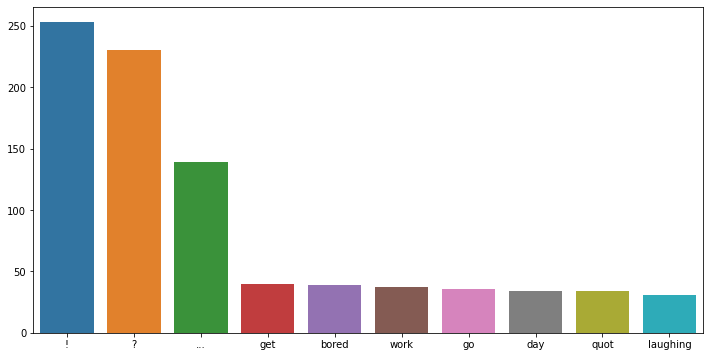

In [104]:
#empty
words=[word for i in data.tokens2[data.sentiment=="empty"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)
plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

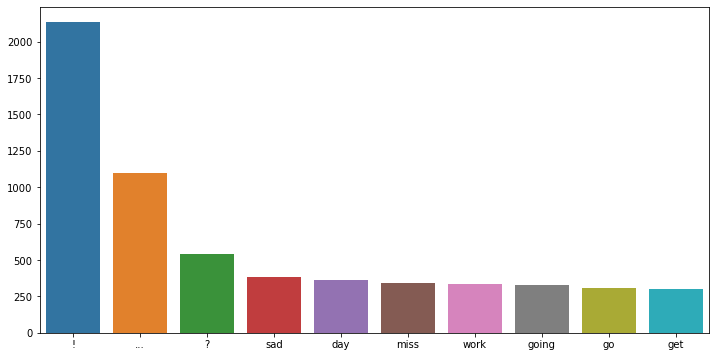

In [95]:
#sadness
words=[word for i in data.tokens2[data.sentiment=="sadness"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)
  
plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

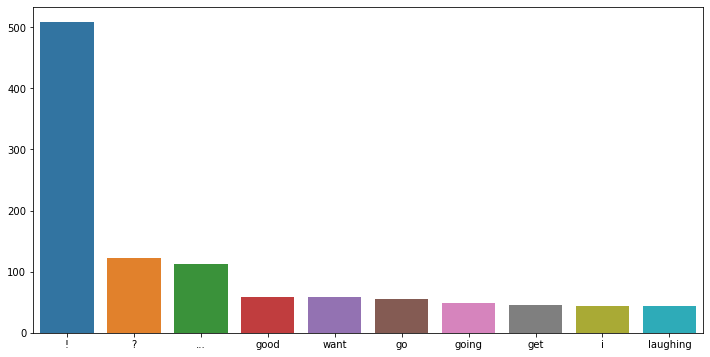

In [96]:
#enthusiasm
words=[word for i in data.tokens2[data.sentiment=="enthusiasm"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

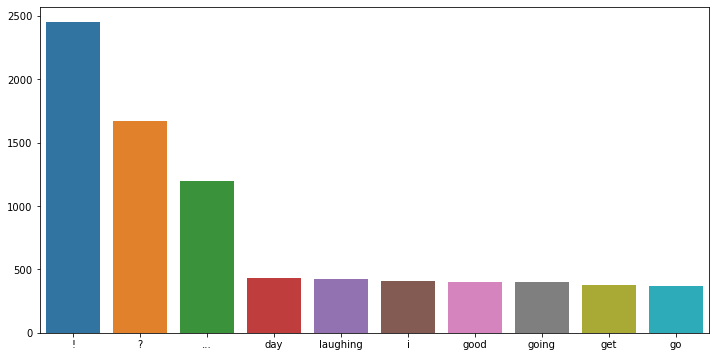

In [97]:
#neutral
words=[word for i in data.tokens2[data.sentiment=="neutral"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

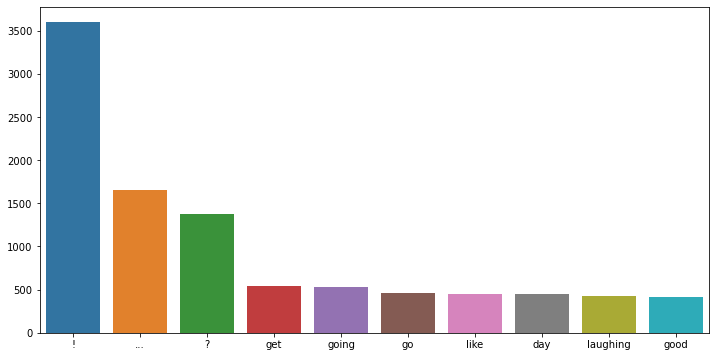

In [98]:
#worry
words=[word for i in data.tokens2[data.sentiment=="worry"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

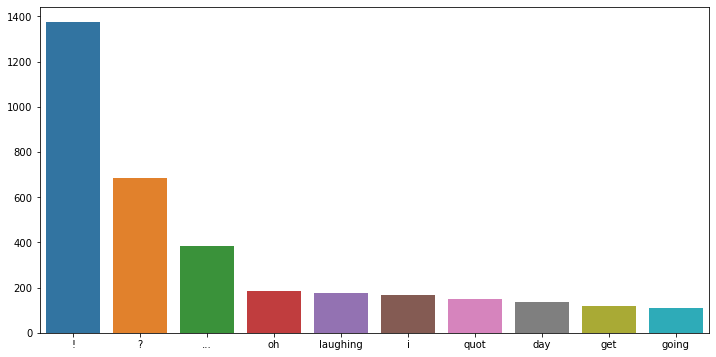

In [99]:
#surprise
words=[word for i in data.tokens2[data.sentiment=="surprise"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

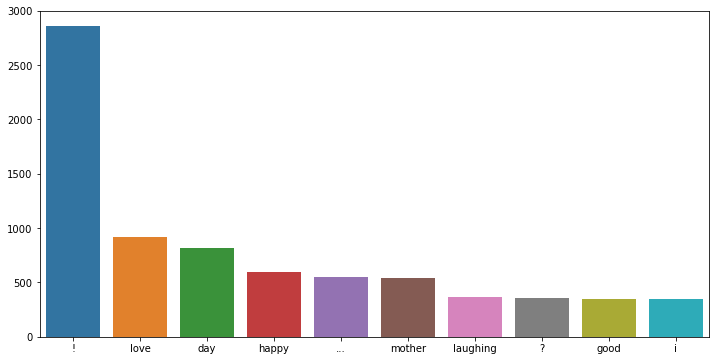

In [100]:
#love
words=[word for i in data.tokens2[data.sentiment=="love"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

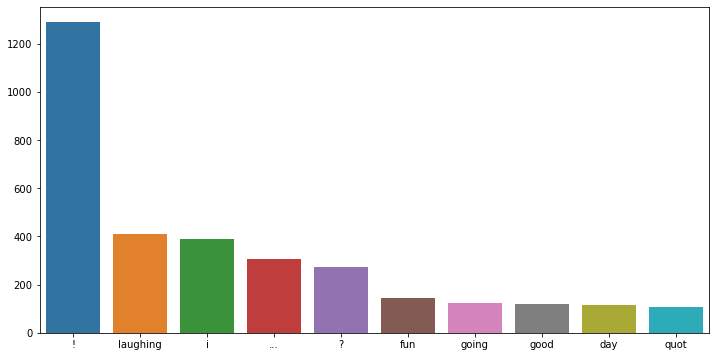

In [101]:
#fun
words=[word for i in data.tokens2[data.sentiment=="fun"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

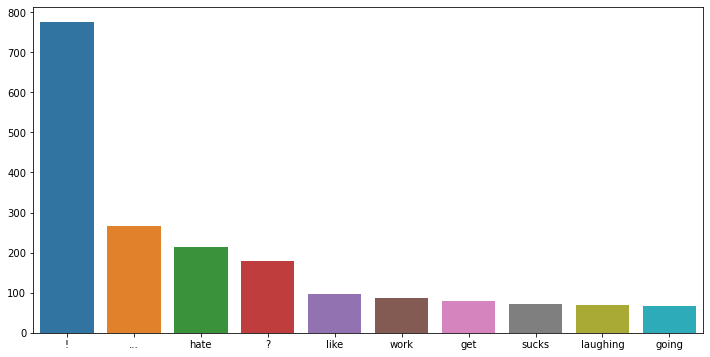

In [102]:
#hate
words=[word for i in data.tokens2[data.sentiment=="hate"] for word in i] #non funziona perchè devo fare i token prima
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

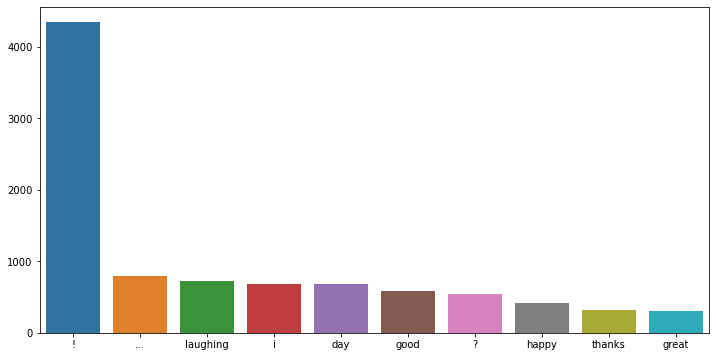

In [103]:
#happiness
words=[word for i in data.tokens2[data.sentiment=="happiness"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

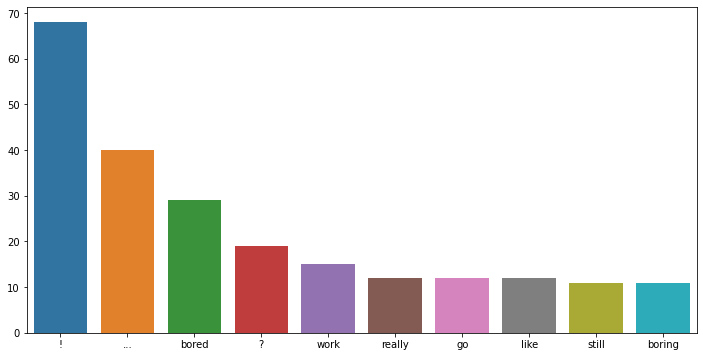

In [104]:
#boredom
words=[word for i in data.tokens2[data.sentiment=="boredom"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

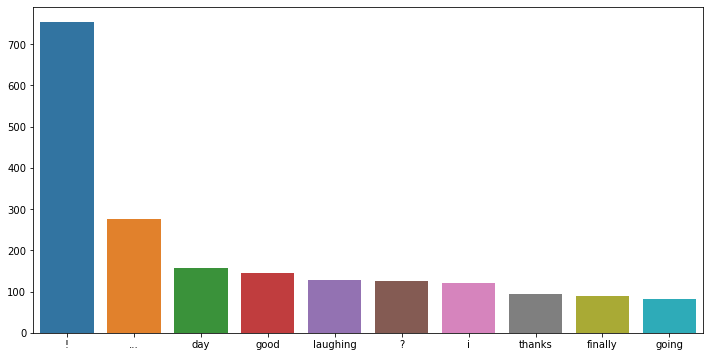

In [105]:
#relief
words=[word for i in data.tokens2[data.sentiment=="relief"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

<AxesSubplot:>

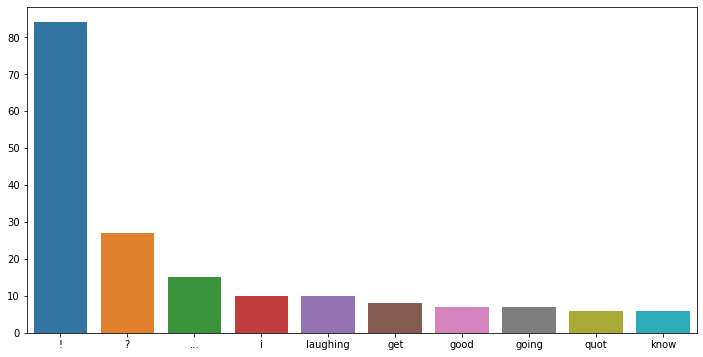

In [106]:
#anger
words=[word for i in data.tokens2[data.sentiment=="anger"] for word in i] 
counter=Counter(words)
most=counter.most_common()
X,Y=[],[]
for word, count in most[:10]:
    X.append(word)
    Y.append(count)

plt.subplots(figsize=(12, 6))
sns.barplot(x=X, y=Y)

In [107]:
#BIGRAMS

<AxesSubplot:>

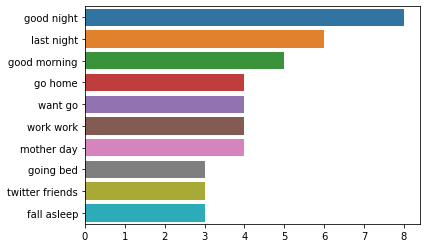

In [108]:
bigrams=n_grams(data.tokens2[data.sentiment=="empty"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

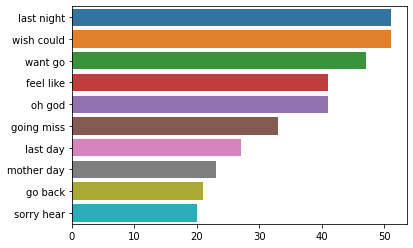

In [109]:
bigrams=n_grams(data.tokens2[data.sentiment=="sadness"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

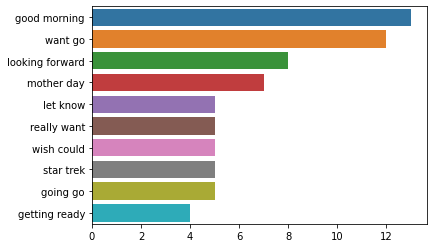

In [110]:
bigrams=n_grams(data.tokens2[data.sentiment=="enthusiasm"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

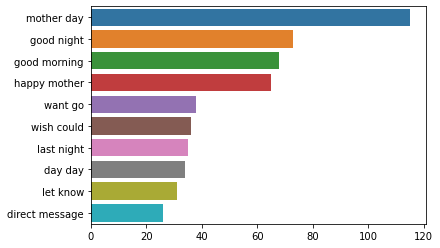

In [111]:
bigrams=n_grams(data.tokens2[data.sentiment=="neutral"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

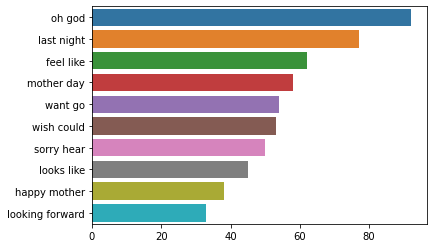

In [112]:
bigrams=n_grams(data.tokens2[data.sentiment=="worry"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

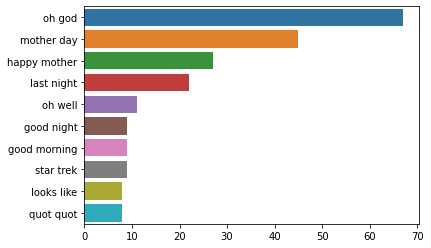

In [113]:
bigrams=n_grams(data.tokens2[data.sentiment=="surprise"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

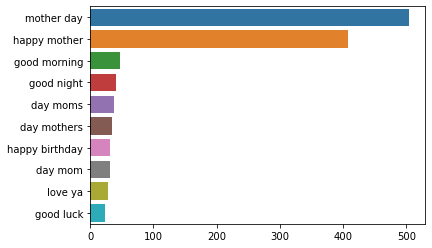

In [114]:
bigrams=n_grams(data.tokens2[data.sentiment=="love"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

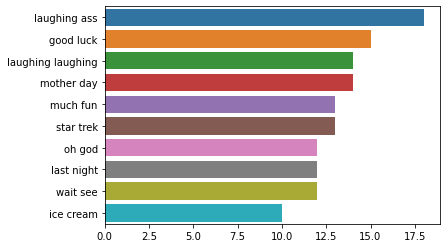

In [115]:
bigrams=n_grams(data.tokens2[data.sentiment=="fun"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

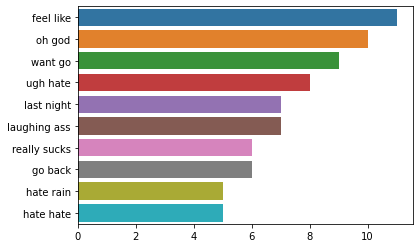

In [116]:
bigrams=n_grams(data.tokens2[data["sentiment"]=="hate"].apply(" ".join), 2)

x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

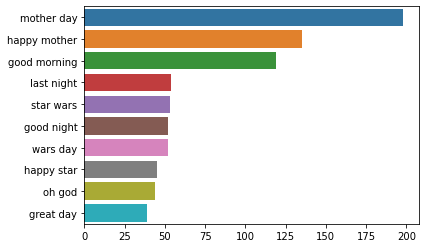

In [117]:
bigrams=n_grams(data.tokens2[data.sentiment=="happiness"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

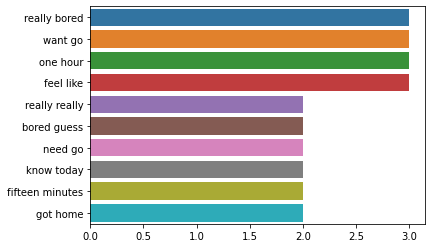

In [118]:
bigrams=n_grams(data.tokens2[data.sentiment=="boredom"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

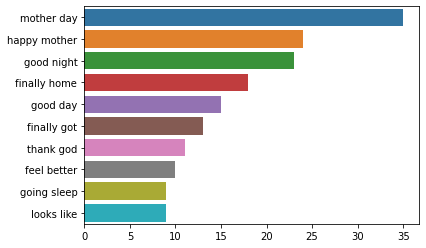

In [119]:
bigrams=n_grams(data.tokens2[data.sentiment=="relief"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

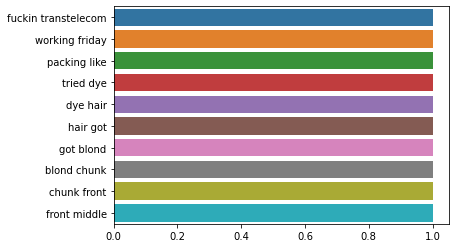

In [120]:
bigrams=n_grams(data.tokens2[data.sentiment=="anger"].apply(" ".join), 2)[:10]


x,y=[],[]
for word,count in bigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

In [121]:
#TRIGRAMS

<AxesSubplot:>

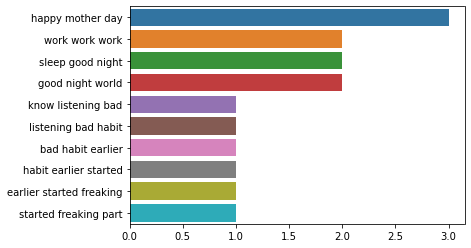

In [122]:
#empty
trigrams=n_grams(data.tokens2[data.sentiment=="empty"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

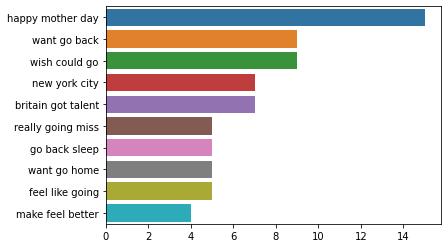

In [123]:
trigrams=n_grams(data.tokens2[data.sentiment=="sadness"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

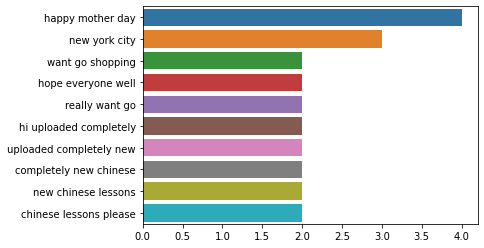

In [124]:
#enthusiasm
trigrams=n_grams(data.tokens2[data.sentiment=="enthusiasm"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

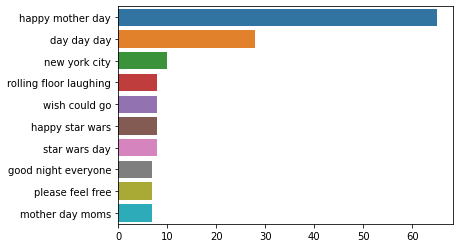

In [125]:
#neutral
trigrams=n_grams(data.tokens2[data.sentiment=="neutral"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

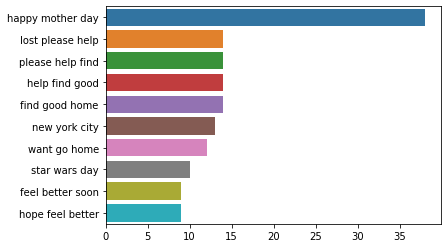

In [126]:
#worry
trigrams=n_grams(data.tokens2[data.sentiment=="worry"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

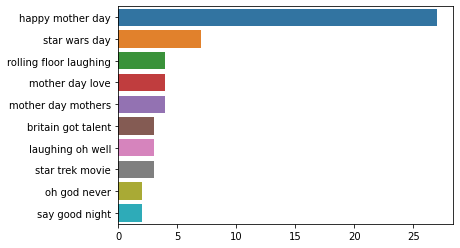

In [127]:
#surprise
trigrams=n_grams(data.tokens2[data.sentiment=="surprise"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

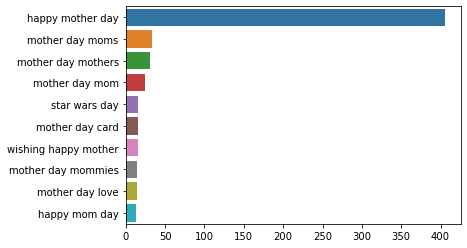

In [128]:
#love
trigrams=n_grams(data.tokens2[data.sentiment=="love"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

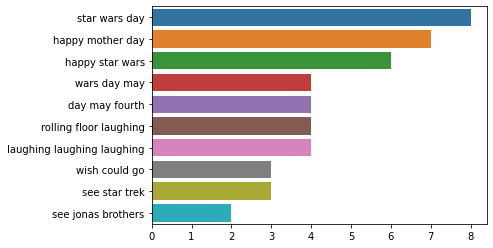

In [129]:
#fun
trigrams=n_grams(data.tokens2[data.sentiment=="fun"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

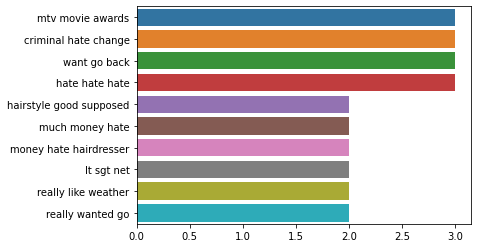

In [130]:
#hate
trigrams=n_grams(data.tokens2[data["sentiment"]=="hate"].apply(" ".join), 3)

x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

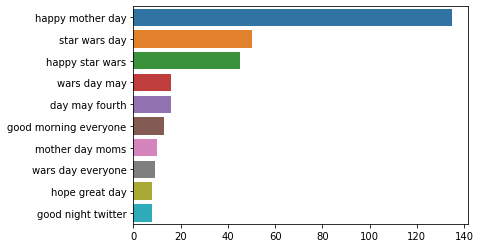

In [131]:
#happiness
trigrams=n_grams(data.tokens2[data.sentiment=="happiness"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

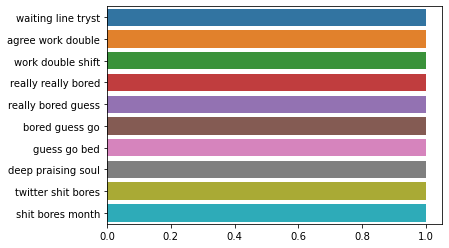

In [132]:
#boredom
trigrams=n_grams(data.tokens2[data.sentiment=="boredom"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

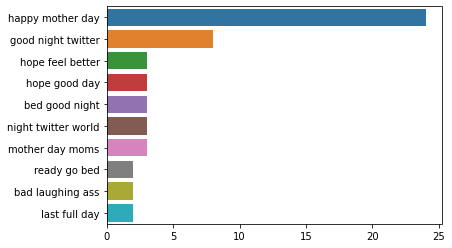

In [133]:
#relief
trigrams=n_grams(data.tokens2[data.sentiment=="relief"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

<AxesSubplot:>

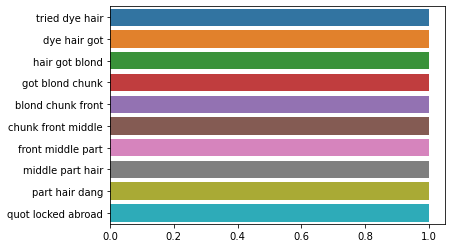

In [134]:
#anger
trigrams=n_grams(data.tokens[data.sentiment=="anger"].apply(" ".join), 3)[:10]


x,y=[],[]
for word,count in trigrams:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)

In [135]:
################################################################################################################################

In [105]:
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
lemma=WordNetLemmatizer()
lemmatized_words_verbs=[]
for s in data["tokens2"]:
    lemmatized_sentence=[lemma.lemmatize(i, pos="v") for i in s]
    lemmatized_words_verbs.append(lemmatized_sentence)

lemmatized_words_verbs_nouns=[]
for s in lemmatized_words_verbs:
    lemmatized_sentence=[lemma.lemmatize(i, pos="n") for i in s]
    lemmatized_words_verbs_nouns.append(lemmatized_sentence)

lemmatized_words_verbs_nouns_adjectives=[]
for s in lemmatized_words_verbs_nouns:
    lemmatized_sentence=[lemma.lemmatize(i, pos="a") for i in s]
    lemmatized_words_verbs_nouns_adjectives.append(lemmatized_sentence)
  
lemmatized_words_verbs_nouns_adjectives_adverbs=[]
for s in lemmatized_words_verbs_nouns_adjectives:
    lemmatized_sentence=[lemma.lemmatize(i, pos="r") for i in s]
    lemmatized_words_verbs_nouns_adjectives_adverbs.append(lemmatized_sentence)
    
lemma_complete=[]
for s in lemmatized_words_verbs_nouns_adjectives_adverbs:
    lemmatized_sentence=[lemma.lemmatize(i, pos="s") for i in s]
    lemma_complete.append(lemmatized_sentence)

In [106]:
#import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
lemma=WordNetLemmatizer()
lemmatized_words_verbs_nouns=[]
for s in data["tokens2"]:
    lemmatized_sentence=[lemma.lemmatize(i, pos="n") for i in s]
    lemmatized_words_verbs_nouns.append(lemmatized_sentence)

lemmatized_words_verbs_nouns_adjectives=[]
for s in lemmatized_words_verbs_nouns:
    lemmatized_sentence=[lemma.lemmatize(i, pos="a") for i in s]
    lemmatized_words_verbs_nouns_adjectives.append(lemmatized_sentence)
    
lemmatized_words_verbs_nouns_adjectives_adverbs=[]
for s in lemmatized_words_verbs_nouns_adjectives:
    lemmatized_sentence=[lemma.lemmatize(i, pos="r") for i in s]
    lemmatized_words_verbs_nouns_adjectives_adverbs.append(lemmatized_sentence)
    
lemma_v=[]
for s in lemmatized_words_verbs_nouns_adjectives_adverbs:
    lemmatized_sentence=[lemma.lemmatize(i, pos="s") for i in s]
    lemma_v.append(lemmatized_sentence)

In [107]:
data["lemma complete"]=lemma_complete
document_complete = data["lemma complete"].str.join(" ")
list(document_complete)[0], list(document_complete)[2]

('know listen bad habit early start freak part',
 'funeral ceremony ... gloomy friday ...')

In [108]:
data["lemma verbs"]=lemma_v
document_verbs = data["lemma verbs"].str.join(" ")
list(document_verbs)[0], list(document_verbs)[2]

('know listening bad habit early started freaking part',
 'funeral ceremony ... gloomy friday ...')

In [110]:
data.tail(1)

tweet_id sentiment  \
464  MR. PINK       NaN   

                                                                                          content  \
464  Do you know what this is? It's the world's smallest violin, playing just for the waitresses.   

                                                                               sentence_corrected  \
464  do you know what this is? it's the world's smallest violin, playing just for the waitresses.   

    tokens                                   lemma complete  \
464    NaN  [know, ?, world, small, violin, play, waitress]   

                                            lemma verbs  \
464  [know, ?, world, small, violin, playing, waitress]   

                                                                            sentence corrected 2  \
464  do you know what this is? it s the world s smallest violin playing just for the waitresses.   

                                                     tokens2  
464  [know, ?, world, smallest, violin, playing, waitresses]

In [30]:
###############################################################################################################################

In [111]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import StandardScaler
tfidf = TfidfVectorizer(use_idf=True)
X_tfidf= tfidf.fit_transform(list(document_complete))
X_tfidf_array_complete = X_tfidf.toarray()
X_tfidf_array_complete.shape

(40390, 19058)

In [112]:
tfidf = TfidfVectorizer(use_idf=True)
X_tfidf= tfidf.fit_transform(list(document_verbs))
X_tfidf_array_verbs = X_tfidf.toarray()
X_tfidf_array_verbs.shape

(40390, 21336)

In [177]:
#############################################################################################################################

In [178]:
#FEATURE SELECTION

<AxesSubplot:ylabel='Count'>

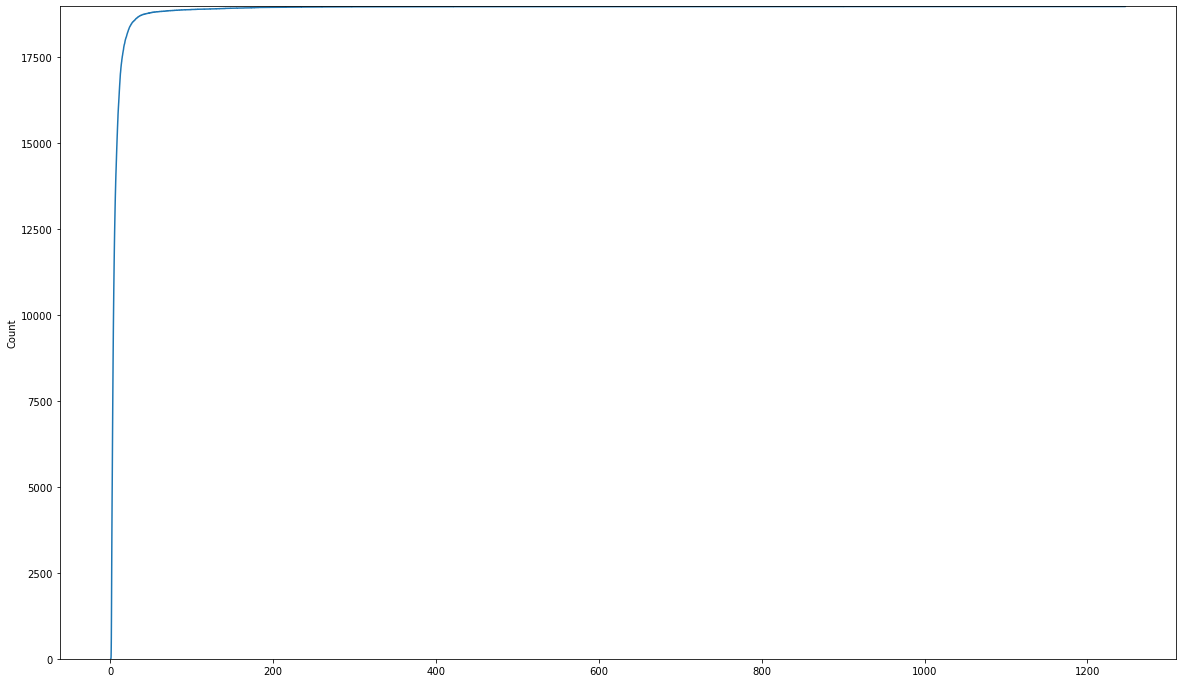

In [113]:
#CHI SQUARE
from sklearn.feature_selection import chi2
score, p_value=chi2(X_tfidf_array_complete[0:39925,:], data["sentiment"].iloc[0:39925].values)
plt.figure(figsize=(20,12))
sns.ecdfplot(score, stat="count")

<AxesSubplot:ylabel='Count'>

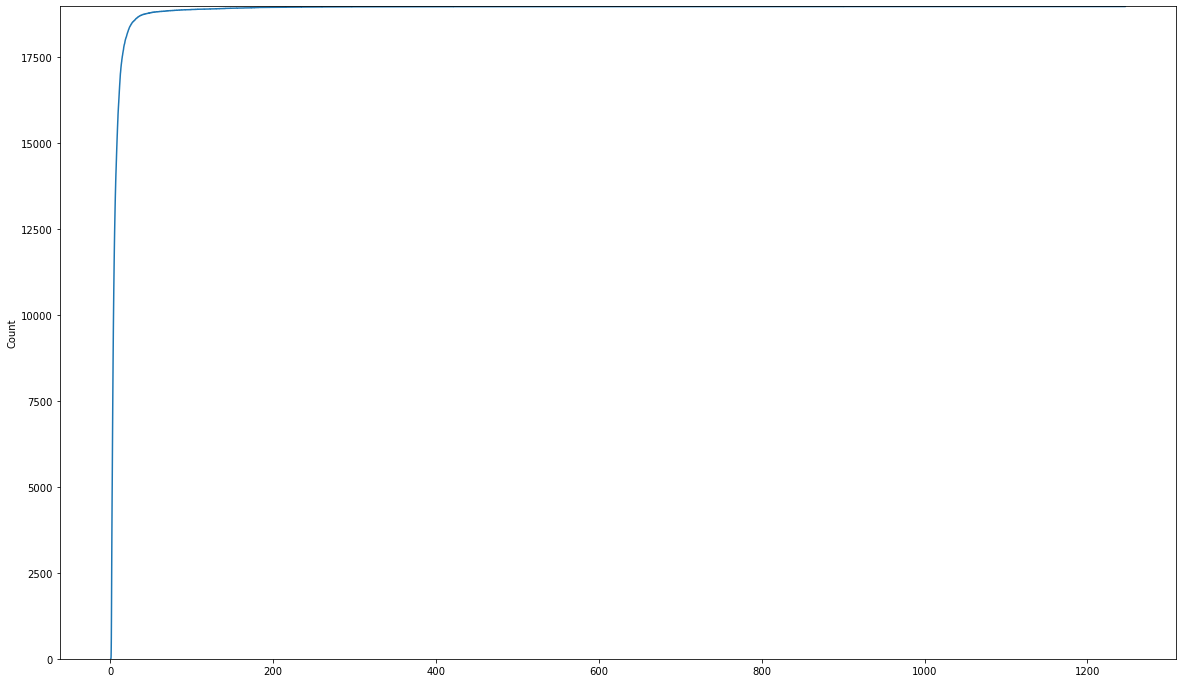

In [114]:
score2, p_value2=chi2(X_tfidf_array_verbs[0:39925,:], data["sentiment"].iloc[0:39925].values)
plt.figure(figsize=(20,12))
sns.ecdfplot(score, stat="count")

In [115]:
np.sum(np.array(score>6.8).astype(int))  

5000

In [116]:
np.sum(np.array(score2>7.42485).astype(int)) 

5000

In [117]:
#retrieve the indexes of the first 5000 most important words
index_most_important_words=[i for i,n in enumerate(score) if n > 6.8]
index_most_important_words2=[i for i,n in enumerate(score2) if n > 7.42485]

In [118]:
#data frame with all the most important words
pd.set_option('display.max_rows', None)
most_important_words_10k=[tfidf.get_feature_names()[i] for i in index_most_important_words]
df_most_important_words_10k=pd.DataFrame(most_important_words_10k, columns=["word"])
df_most_important_words_10k

word
0                                                        00000000000
1                                                              000th
2                                                               00pm
3                                                                 04
4                                                                 06
5                                                               1000
6                                                              1000x
7                                                                101
8                                                               1017
9                                                                109
10                                                              10th
11                                                                11
12                                                               110
13                                                              1100
14                                                              1155
15                                                              11th
16                                                               121
17                                                               12k
18                                                               12p
19                                                               135
20                                                               136
21                                                               138
22                                                               14m
23                                                              14th
24                                                              14yr
25                                                              1500
26                                                               165
27                                                             16lbs
28                                                              16th
29                                                                17
30                                                              17lb
31                                                              1800
32                                                               190
33                                                              1971
34                                                              1987
35                                                              1994
36                                                              1999
37                                                                1k
38                                                               1mo
39                                                                20
40                                                              2003
41                                                             20ish
42                                                              20pm
43                                                                22
44                                                               222
45                                                              2220
46                                                              22is
47                                                               230
48                                                               234
49                                                              250e
50                                                               262
51                                                              26th
52                                                                27
53                                                              2833
54                                                               286
55                                                               28c
56                                                               291
57                                                            

In [119]:
#data frame with all the most important words lemma without verbs
pd.set_option('display.max_rows', None)
most_important_words_verbs=[tfidf.get_feature_names()[i] for i in index_most_important_words2]
df_most_important_words_verbs=pd.DataFrame(most_important_words_verbs, columns=["word"])
df_most_important_words_verbs

word
0                                                        00000000000
1                                                              000th
2                                                               00pm
3                                                                 04
4                                                                 06
5                                                               1000
6                                                              1000x
7                                                                101
8                                                               1017
9                                                                109
10                                                              10th
11                                                               110
12                                                              1100
13                                                              1155
14                                                              11th
15                                                               121
16                                                               12p
17                                                               135
18                                                               136
19                                                               138
20                                                               14m
21                                                              14th
22                                                               165
23                                                             16lbs
24                                                              16th
25                                                                17
26                                                              1800
27                                                               190
28                                                              1971
29                                                              1987
30                                                              1994
31                                                              1999
32                                                                1k
33                                                               1mo
34                                                                20
35                                                              2003
36                                                             20ish
37                                                              20pm
38                                                                22
39                                                               222
40                                                              2220
41                                                              22is
42                                                               230
43                                                               234
44                                                              250e
45                                                               262
46                                                              26th
47                                                                27
48                                                              2833
49                                                               286
50                                                               28c
51                                                               291
52                                                                2d
53                                                             2hear
54                                                              2hrs
55                                                             2jobs
56                                                                2k
57                                                            

In [120]:
pos=nltk.pos_tag(most_important_words_10k)
pos1=nltk.pos_tag(most_important_words_verbs)

In [121]:
from collections import Counter
counts = Counter(tag for word,tag in pos)
counts

Counter({'CD': 140,
         'JJ': 917,
         'NN': 2628,
         'IN': 49,
         'VBG': 324,
         'NNS': 129,
         'RB': 170,
         'VBZ': 37,
         'VBD': 262,
         'VBP': 138,
         'VBN': 107,
         'RP': 5,
         'VB': 34,
         'FW': 23,
         'DT': 2,
         'CC': 2,
         'MD': 7,
         'WRB': 1,
         'JJS': 3,
         'JJR': 6,
         'RBR': 5,
         'WP': 1,
         'PRP': 2,
         'NNP': 7,
         'EX': 1})

In [122]:
counts1 = Counter(tag for word,tag in pos1)
counts1

Counter({'CD': 128,
         'JJ': 980,
         'NN': 2489,
         'IN': 40,
         'RB': 177,
         'NNS': 123,
         'VBP': 148,
         'VBN': 108,
         'VBD': 291,
         'VBG': 342,
         'RP': 5,
         'VBZ': 38,
         'VB': 33,
         'JJS': 8,
         'DT': 5,
         'FW': 17,
         'CC': 4,
         'MD': 4,
         'JJR': 11,
         'RBR': 10,
         'PRP$': 1,
         'NNP': 29,
         'PRP': 2,
         'WRB': 4,
         'WDT': 1,
         'WP': 1,
         'UH': 1})

In [123]:
unique_pos=np.unique(list(counts.keys())+list(counts1.keys()))
unique_pos
new_dict_counts={}
for i in unique_pos:
    if i in counts.keys() and i in counts1.keys():
        new_dict_counts[i]=[counts[i], counts1[i]]
    elif i in counts.keys() and i not in counts1.keys():
        new_dict_counts[i]=[counts[i], 0]
    elif i not in counts.keys() and i in counts1.keys():
        new_dict_counts[i]=[0, counts1[i]]
        
new_dict_counts

{'CC': [2, 4],
 'CD': [140, 128],
 'DT': [2, 5],
 'EX': [1, 0],
 'FW': [23, 17],
 'IN': [49, 40],
 'JJ': [917, 980],
 'JJR': [6, 11],
 'JJS': [3, 8],
 'MD': [7, 4],
 'NN': [2628, 2489],
 'NNP': [7, 29],
 'NNS': [129, 123],
 'PRP': [2, 2],
 'PRP$': [0, 1],
 'RB': [170, 177],
 'RBR': [5, 10],
 'RP': [5, 5],
 'UH': [0, 1],
 'VB': [34, 33],
 'VBD': [262, 291],
 'VBG': [324, 342],
 'VBN': [107, 108],
 'VBP': [138, 148],
 'VBZ': [37, 38],
 'WDT': [0, 1],
 'WP': [1, 1],
 'WRB': [1, 4]}

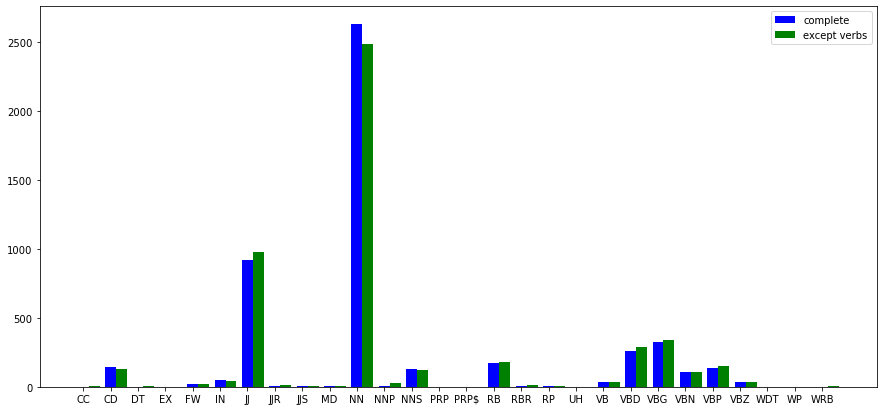

In [124]:
keys = [key for key in new_dict_counts.keys()]
values = [value for value in new_dict_counts.values()]
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values],
       width=0.4, color='b', align='edge')
ax.bar(np.arange(len(keys)) + 0.2,
       [value[1] if len(value) == 2 else 0 for value in values],
       width=0.4, color='g', align='edge')
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.legend(labels=['complete', 'except verbs'])
plt.show()

In [125]:
#new tfidf array with the most important words
X_tfidf_array_complete_5k=X_tfidf_array_complete[:,index_most_important_words ]
X_tfidf_array_verbs_5k=X_tfidf_array_verbs[:,index_most_important_words2 ]
np.shape(X_tfidf_array_complete_5k), np.shape(X_tfidf_array_verbs_5k)

((40390, 5000), (40390, 5000))

In [193]:
###############################################################################################################################

In [194]:
#CLASSIFICATION

In [126]:
#TRAINING AND TEST SET     

X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf_array_complete_5k[0:39925,:], data["sentiment"].iloc[0:39925].values, train_size=0.80, stratify=data["sentiment"].iloc[0:39925], random_state=42)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_tfidf_array_verbs_5k[0:39925,:], data["sentiment"].iloc[0:39925].values, train_size=0.80, stratify=data["sentiment"].iloc[0:39925], random_state=42)

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
np.shape(X_train1)

(31940, 5000)

In [56]:
#SVM GAUSSIAN KERNEL
from sklearn import svm

training_errors=[]
test_errors=[]
best_score=0
best_model=''
for i in [0.5, 1, 2, 3]:
    svm_model=svm.SVC(C=i, kernel="rbf", gamma=0.25).fit(X_train1, Y_train1)
    predictions_train=svm_model.predict(X_train1)
    predictions_test=svm_model.predict(X_test1)
    train_accuracy=accuracy_score(Y_train1, predictions_train)
    test_accuracy=accuracy_score(Y_test1, predictions_test)
    training_errors.append(1-train_accuracy)
    test_errors.append(1-test_accuracy)
    if test_accuracy > best_score:
        best_model=svm_model
        best_score=test_accuracy
    

In [57]:
training_errors, test_errors

([0.6467125860989356,
  0.6206950532247966,
  0.5857858484658736,
  0.5521916092673763],
 [0.671008140262993,
  0.6564809016906701,
  0.6470882905447715,
  0.6429555416405761])

In [60]:
best_model

SVC(C=3, gamma=0.25)

In [62]:
Y_test_prediction=best_model.predict(X_test1)

In [63]:
best_model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

NameError: name 'Y_test_prediction' is not defined

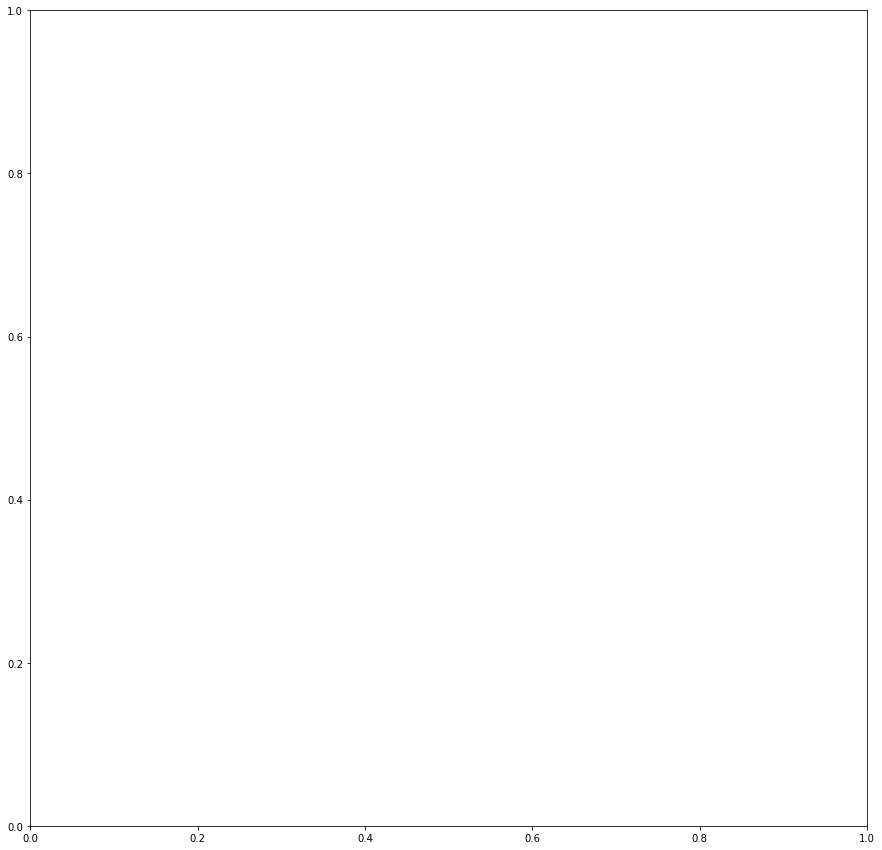

In [88]:
fig, ax = plt.subplots(figsize=(15,15))
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test1, Y_test_prediction), display_labels=best_model.classes_)
disp.plot(ax=ax)
plt.show()

In [70]:
data.tail(1)

tweet_id sentiment  \
464  MR. PINK       NaN   

                                                                                          content  \
464  Do you know what this is? It's the world's smallest violin, playing just for the waitresses.   

                                                                               sentence_corrected  \
464  do you know what this is? it's the world's smallest violin, playing just for the waitresses.   

    tokens  length corpus  \
464    NaN            NaN   

                                                                            sentence corrected 2  \
464  do you know what this is? it s the world s smallest violin playing just for the waitresses.   

                                                     tokens2  \
464  [know, ?, world, smallest, violin, playing, waitresses]   

                                      lemma complete  \
464  [know, ?, world, small, violin, play, waitress]   

                                            lemma verbs  
464  [know, ?, world, small, violin, playing, waitress]

In [46]:
#SVM GAUSSIAN KERNEL
from sklearn import svm

training_errors=[]
test_errors=[]
best_score=0
best_model=''
for i in [0.1, 0.15, 0.5, 1]:
    svm_model=svm.SVC(C=3, kernel="rbf", gamma=i).fit(X_train1, Y_train1)
    predictions_train=svm_model.predict(X_train1)
    predictions_test=svm_model.predict(X_test1)
    train_accuracy=accuracy_score(Y_train1, predictions_train)
    test_accuracy=accuracy_score(Y_test1, predictions_test)
    training_errors.append(1-train_accuracy)
    test_errors.append(1-test_accuracy)
    if test_accuracy > best_score:
        best_model=svm_model
        best_score=test_accuracy
        
    print(f"gamma: {i}")
    print(f"training error: {1-train_accuracy}")
    print(f"test error: {1-test_accuracy}")
    print("----------------------------------------------------------------")

gamma: 0.1
training error: 0.6139323731997495
test error: 0.6525986224170319
----------------------------------------------------------------
gamma: 0.15
training error: 0.5949279899812148
test error: 0.6487163431433939
----------------------------------------------------------------
gamma: 0.5
training error: 0.44211020663744516
test error: 0.6400751408891672
----------------------------------------------------------------
gamma: 1
training error: 0.2762993112085159
test error: 0.641577958672511
----------------------------------------------------------------


In [47]:
best_model=svm.SVC(C=3, kernel="rbf", gamma=0.5).fit(X_train1, Y_train1)
Y_test_prediction=best_model.predict(X_test1)
Y_train_prediction=best_model.predict(X_train1)
print(f"training error: {1- train_accuracy=accuracy_score(Y_train1, predictions_train)}")
print(f"test error: {1 - test_accuracy=accuracy_score(Y_test1, predictions_test)}")

SVC(C=3, gamma=0.5)

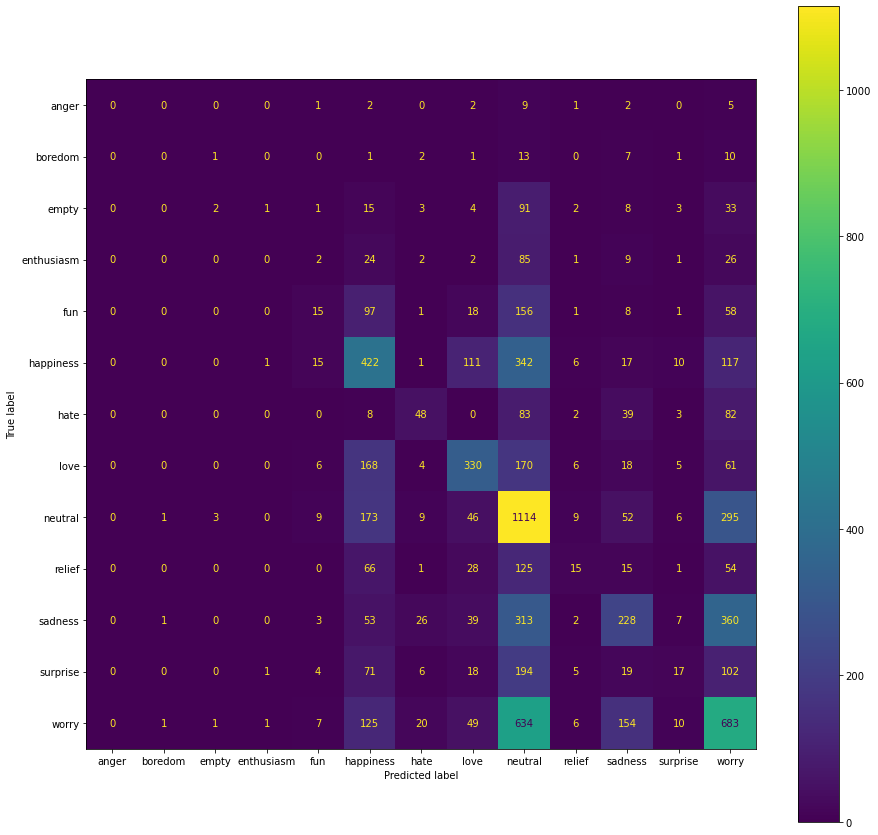

In [48]:
#Y_test_prediction=best_model.predict(X_test1)
fig, ax = plt.subplots(figsize=(15,15))
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test1, Y_test_prediction), display_labels=best_model.classes_)
disp.plot(ax=ax)
plt.show()

In [49]:
#SVM GAUSSIAN KERNEL  LEMMA COMPLETE
from sklearn import svm

training_errors=[]
test_errors=[]
best_score=0
best_model=''
for i in [0.1, 0.5, 1, 2, 3]:
    svm_model=svm.SVC(C=i, kernel="rbf", gamma=0.25).fit(X_train, Y_train)
    predictions_train=svm_model.predict(X_train)
    predictions_test=svm_model.predict(X_test)
    train_accuracy=accuracy_score(Y_train, predictions_train)
    test_accuracy=accuracy_score(Y_test, predictions_test)
    training_errors.append(1-train_accuracy)
    test_errors.append(1-test_accuracy)
    if test_accuracy > best_score:
        best_model=svm_model
        best_score=test_accuracy
        
    print(f"regularization: {i}")
    print(f"training error: {1-train_accuracy}")
    print(f"test error: {1-test_accuracy}")
    print("----------------------------------------------------------------")

tweet_id   sentiment  \
0  1956967341       empty   
1  1956967666     sadness   
2  1956967696     sadness   
3  1956967789  enthusiasm   
4  1956968416     neutral   

                                                                                       content  \
0  @tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[   
1                                  layin n bed with a headache ughhhh...waitin on your call...   
2                                                          funeral ceremony...gloomy friday...   
3                                                         wants to hang out with friends soon!   
4       @dannycastillo we want to trade with someone who has houston tickets, but no one will.   

                                                                  sentence_corrected  \
0  i know i was listening to bad habit earlier and i started freaking at his part =[   
1                         layin n bed with a headache, ugh...waiting on your call...   
2                                                funeral ceremony...gloomy friday...   
3                                               wants to hang out with friends soon!   
4            we want to trade with someone who has houston tickets, but no one will.   

                                                                         tokens  \
0  [i, know, i, listening, bad, habit, earlier, i, started, freaking, part, =[]   
1                       [layin, n, bed, headache, ugh, ..., waiting, call, ...]   
2                                 [funeral, ceremony, ..., gloomy, friday, ...]   
3                                               [wants, hang, friends, soon, !]   
4                             [we, want, trade, someone, houston, tickets, one]   

                                                               sentence corrected 2  \
0  i know i was listening to bad habit earlier and i started freaking at his part [   
1                      layin  in  bed with a headache ugh...waiting on your call...   
2                                               funeral ceremony...gloomy friday...   
3                                              wants to hang out with friends soon!   
4            we want to trade with someone who has houston tickets but no one will.   

                                                           tokens2  \
0  [know, listening, bad, habit, earlier, started, freaking, part]   
1             [layin, bed, headache, ugh, ..., waiting, call, ...]   
2                    [funeral, ceremony, ..., gloomy, friday, ...]   
3                                  [wants, hang, friends, soon, !]   
4                    [want, trade, someone, houston, tickets, one]   

                                          lemma complete  \
0  [know, listen, bad, habit, early, start, freak, part]   
1      [layin, bed, headache, ugh, ..., wait, call, ...]   
2          [funeral, ceremony, ..., gloomy, friday, ...]   
3                          [want, hang, friend, soon, !]   
4           [want, trade, someone, houston, ticket, one]   

                                                     lemma verbs  
0  [know, listening, bad, habit, early, started, freaking, part]  
1           [layin, bed, headache, ugh, ..., waiting, call, ...]  
2                  [funeral, ceremony, ..., gloomy, friday, ...]  
3                                  [want, hang, friend, soon, !]  
4                   [want, trade, someone, houston, ticket, one]

In [128]:
from sklearn import svm
svm_model_optimal2=svm.SVC(C=3, kernel="rbf", gamma=0.5).fit(X_train, Y_train)

predictions_train_optimal2=svm_model_optimal2.predict(X_train)
predictions_test_optimal2=svm_model_optimal2.predict(X_test)
train_accuracy_optimal2=accuracy_score(Y_train, predictions_train_optimal2)
test_accuracy_optimal2=accuracy_score(Y_test, predictions_test_optimal2)


print(f"training error: {1-train_accuracy_optimal2}")
print(f"test error: {1-test_accuracy_optimal2}")

training error: 0.4182529743268628
test error: 0.6419536631183469


In [129]:
print("matrix X3")
print("regularization term: 3")
print("gamma: 0.5")
print("training error: 0.4183")
print("test error: 0.6420")
print("----------------------------")
print("matrix X4")
print("regularization term: 3")
print("gamma: 0.5")
print("training error: 0.4421")
print("test error: 0.6401")

matrix X3
regularization term: 3
gamma: 0.5
training error: 0.4183
test error: 0.6420
----------------------------
matrix X4
regularization term: 3
gamma: 0.5
training error: 0.4421
test error: 0.6401


In [ ]:
best_model=svm.SVC(C=3, kernel="rbf", gamma=0.5).fit(X_train1, Y_train1)

In [ ]:
predictions_movie=best_model.predict(X_tfidf_array_verbs_5k[39925:,:])

In [ ]:
relation_movies=data[["tweet_id", "sentiment", "content", "sentence corrected 2", "lemma verbs"]].iloc[39925:,:]
relation_movies["prediction"]=predictions_movie

In [ ]:
relation_movies